In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import seaborn as sns



In [2]:
df1 = pd.read_csv("../data/merged_oxt101.csv", index_col=0)
df2 = pd.read_csv("../data/merged_oxt102.csv", index_col=0).drop(columns={'_water.csv'})
df3 = pd.read_csv("../data/merged_oxt103.csv", index_col=0).drop(columns={'_water.csv'})

In [3]:
df3['calculation'] = (df3['EDE_B121069916_K600_bacteria.csv']/df3['EDE_B122079905_K700_oxygen.csv'])
df3

EDE_FT9101_K510_water_flow.csv  \
2021-01-01 00:00:00                       2231166.0   
2021-01-01 00:01:00                       2231166.0   
2021-01-01 00:02:00                       2231166.0   
2021-01-01 00:03:00                       2231166.0   
2021-01-01 00:04:00                       2231166.0   
...                                             ...   
2021-12-31 23:55:00                       2325885.0   
2021-12-31 23:56:00                       2325885.0   
2021-12-31 23:57:00                       2325885.0   
2021-12-31 23:58:00                       2325885.0   
2021-12-31 23:59:00                       2325885.0   

                     EDE_B122079905_K700_oxygen.csv  \
2021-01-01 00:00:00                           2.144   
2021-01-01 00:01:00                           2.157   
2021-01-01 00:02:00                           2.116   
2021-01-01 00:03:00                           2.138   
2021-01-01 00:04:00                           2.183   
...                                             ...   
2021-12-31 23:55:00                           2.886   
2021-12-31 23:56:00                           2.808   
2021-12-31 23:57:00                           2.568   
2021-12-31 23:58:00                           1.751   
2021-12-31 23:59:00                           1.100   

                     EDE_B121069916_K600_bacteria.csv  \
2021-01-01 00:00:00                             4.617   
2021-01-01 00:01:00                             4.619   
2021-01-01 00:02:00                             4.622   
2021-01-01 00:03:00                             4.623   
2021-01-01 00:04:00                             4.619   
...                                               ...   
2021-12-31 23:55:00                             4.870   
2021-12-31 23:56:00                             4.810   
2021-12-31 23:57:00                             4.817   
2021-12-31 23:58:00                             4.942   
2021-12-31 23:59:00                             5.048   

                     EDE_B121069915_K600_phosphate.csv  calculation  
2021-01-01 00:00:00                              0.282     2.153451  
2021-01-01 00:01:00                              0.254     2.141400  
2021-01-01 00:02:00                              0.238     2.184310  
2021-01-01 00:03:00                              0.239     2.162301  
2021-01-01 00:04:00                              0.241     2.115896  
...                                                ...          ...  
2021-12-31 23:55:00                              0.205     1.687457  
2021-12-31 23:56:00                              0.212     1.712963  
2021-12-31 23:57:00                              0.218     1.875779  
2021-12-31 23:58:00                              0.225     2.822387  
2021-12-31 23:59:00                              0.232     4.589091  

[525600 rows x 5 columns]

In [4]:
df1['bacteria'] = (((df1['EDE_B121069901_K600_oxygen_a.csv'] + df1['EDE_B121069907_K600_oxygen_b.csv'])/2) *df3['calculation'])

In [5]:
df1 = df1.drop(columns={'_water.csv'})

In [6]:
df1 = df1.rename(columns={'EDE_B121069914_K600_nitrate.csv':'nitrate','EDE_B121069917_K600_phosphate.csv':'phosphate','EDE_B121069913_K600_ammonium.csv':'ammonium','EDE_B121069907_K600_oxygen_b.csv':'oxygen_b','EDE_B121069901_K600_oxygen_a.csv':'oxygen_a'})

df1

phosphate  nitrate  ammonium  oxygen_b  oxygen_a  \
2021-01-01 00:00:00      0.185    6.140     4.487     0.029     0.003   
2021-01-01 00:01:00      0.126    6.118     4.263     0.028     0.003   
2021-01-01 00:02:00      0.108    5.963     4.173     0.028     0.003   
2021-01-01 00:03:00      0.122    5.884     4.194     0.028     0.003   
2021-01-01 00:04:00      0.136    5.876     4.214     0.028     0.003   
...                        ...      ...       ...       ...       ...   
2021-12-31 23:55:00      1.935    6.890     2.256     0.549     1.646   
2021-12-31 23:56:00      1.944    6.904     2.264     0.559     1.689   
2021-12-31 23:57:00      2.092    6.985     2.273     0.554     1.693   
2021-12-31 23:58:00      2.133    6.992     2.281     0.568     1.702   
2021-12-31 23:59:00      2.133    6.999     2.289     0.563     1.634   

                     bacteria  
2021-01-01 00:00:00  0.034455  
2021-01-01 00:01:00  0.033192  
2021-01-01 00:02:00  0.033857  
2021-01-01 00:03:00  0.033516  
2021-01-01 00:04:00  0.032796  
...                       ...  
2021-12-31 23:55:00  1.851984  
2021-12-31 23:56:00  1.925370  
2021-12-31 23:57:00  2.107438  
2021-12-31 23:58:00  3.203409  
2021-12-31 23:59:00  5.041116  

[525600 rows x 6 columns]

In [7]:
def get_season(date):
    month = date.month
    day = date.day

    if (month == 3 and day >= 21) or (month == 4 or month == 5) or (month == 6 and day <= 20):
        return 'Spring'
    elif (month == 6 and day >= 21) or (month == 7 or month == 8) or (month == 9 and day <= 22):
        return 'Summer'
    elif (month == 9 and day >= 23) or (month == 10 or month == 11) or (month == 12 and day <= 20):
        return 'Autumn'
    else:
        return 'Winter'

In [8]:
df1['date'] = pd.to_datetime(df1.index)

df1['season'] = df1['date'].apply(get_season)
seasons = df1['season'].value_counts()

spring_data = df1[df1['season'] == 'Spring'].drop(columns={'season', 'date'})
summer_data = df1[df1['season'] == 'Summer'].drop(columns={'season', 'date'})
autumn_data = df1[df1['season'] == 'Autumn'].drop(columns={'season', 'date'})
winter_data = df1[df1['season'] == 'Winter'].drop(columns={'season', 'date'})



In [9]:
spring_data_corr = spring_data.corr().round(5) 
summer_data_corr = summer_data.corr().round(5) 
autumn_data_corr = autumn_data.corr().round(5) 
winter_data_corr = winter_data.corr().round(5) 
df1_corr = df1.drop(columns=['season','date']).corr().round(5) 

spring_data_corr

phosphate  nitrate  ammonium  oxygen_b  oxygen_a  bacteria
phosphate    1.00000 -0.24309   0.47224   0.16984   0.27173   0.14150
nitrate     -0.24309  1.00000   0.28482   0.28298   0.28775   0.09645
ammonium     0.47224  0.28482   1.00000   0.29395   0.37179   0.12593
oxygen_b     0.16984  0.28298   0.29395   1.00000   0.87051   0.39175
oxygen_a     0.27173  0.28775   0.37179   0.87051   1.00000   0.44460
bacteria     0.14150  0.09645   0.12593   0.39175   0.44460   1.00000

In [10]:

fig = px.imshow(df1_corr, text_auto=True, aspect="auto")

fig.update_layout(title='Year 2021')

In [11]:

fig = px.imshow(spring_data_corr, text_auto=True, aspect="auto")

fig.update_layout(title='Spring')

In [12]:
fig = px.imshow(summer_data_corr, text_auto=True, aspect="auto")


fig.update_layout(title='Summer')


In [13]:
fig = px.imshow(autumn_data_corr, text_auto=True, aspect="auto")

fig.update_layout(title='Autumn')


In [14]:
fig = px.imshow(winter_data_corr, text_auto=True, aspect="auto")

fig.update_layout(title='Winter')


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

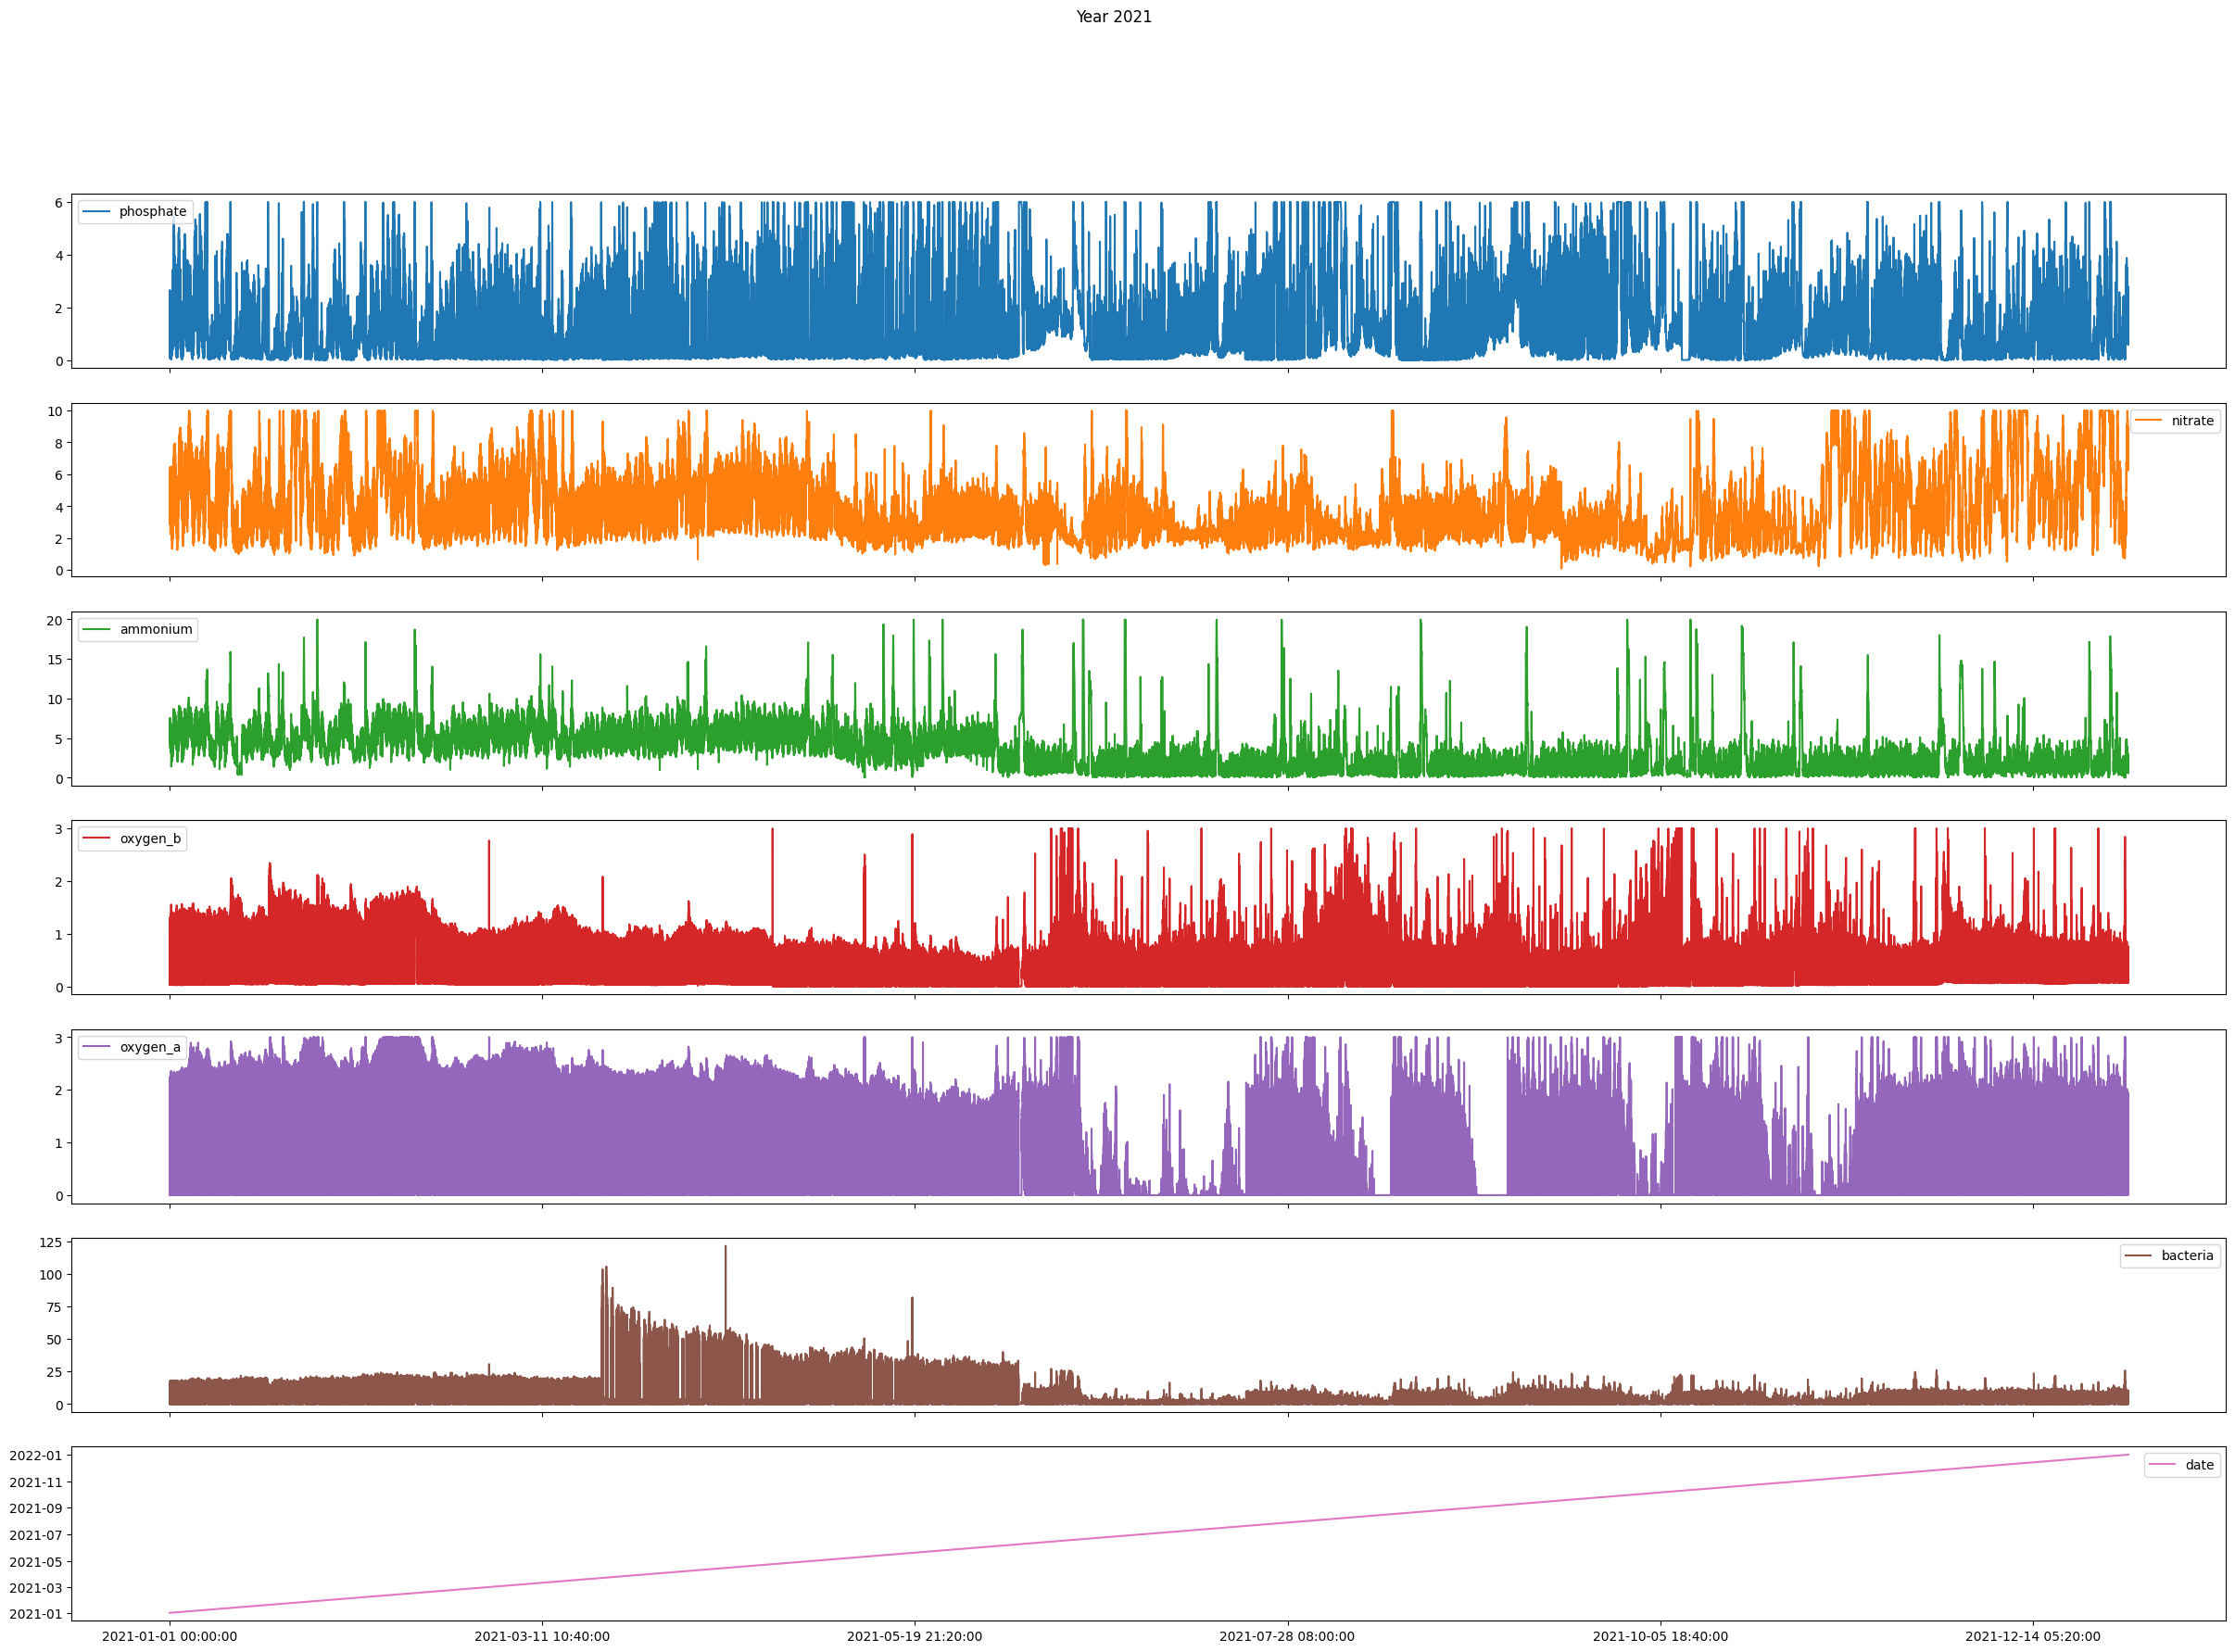

In [15]:
df1.plot.line(subplots = True, figsize=(30, 20),title='Year 2021')

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

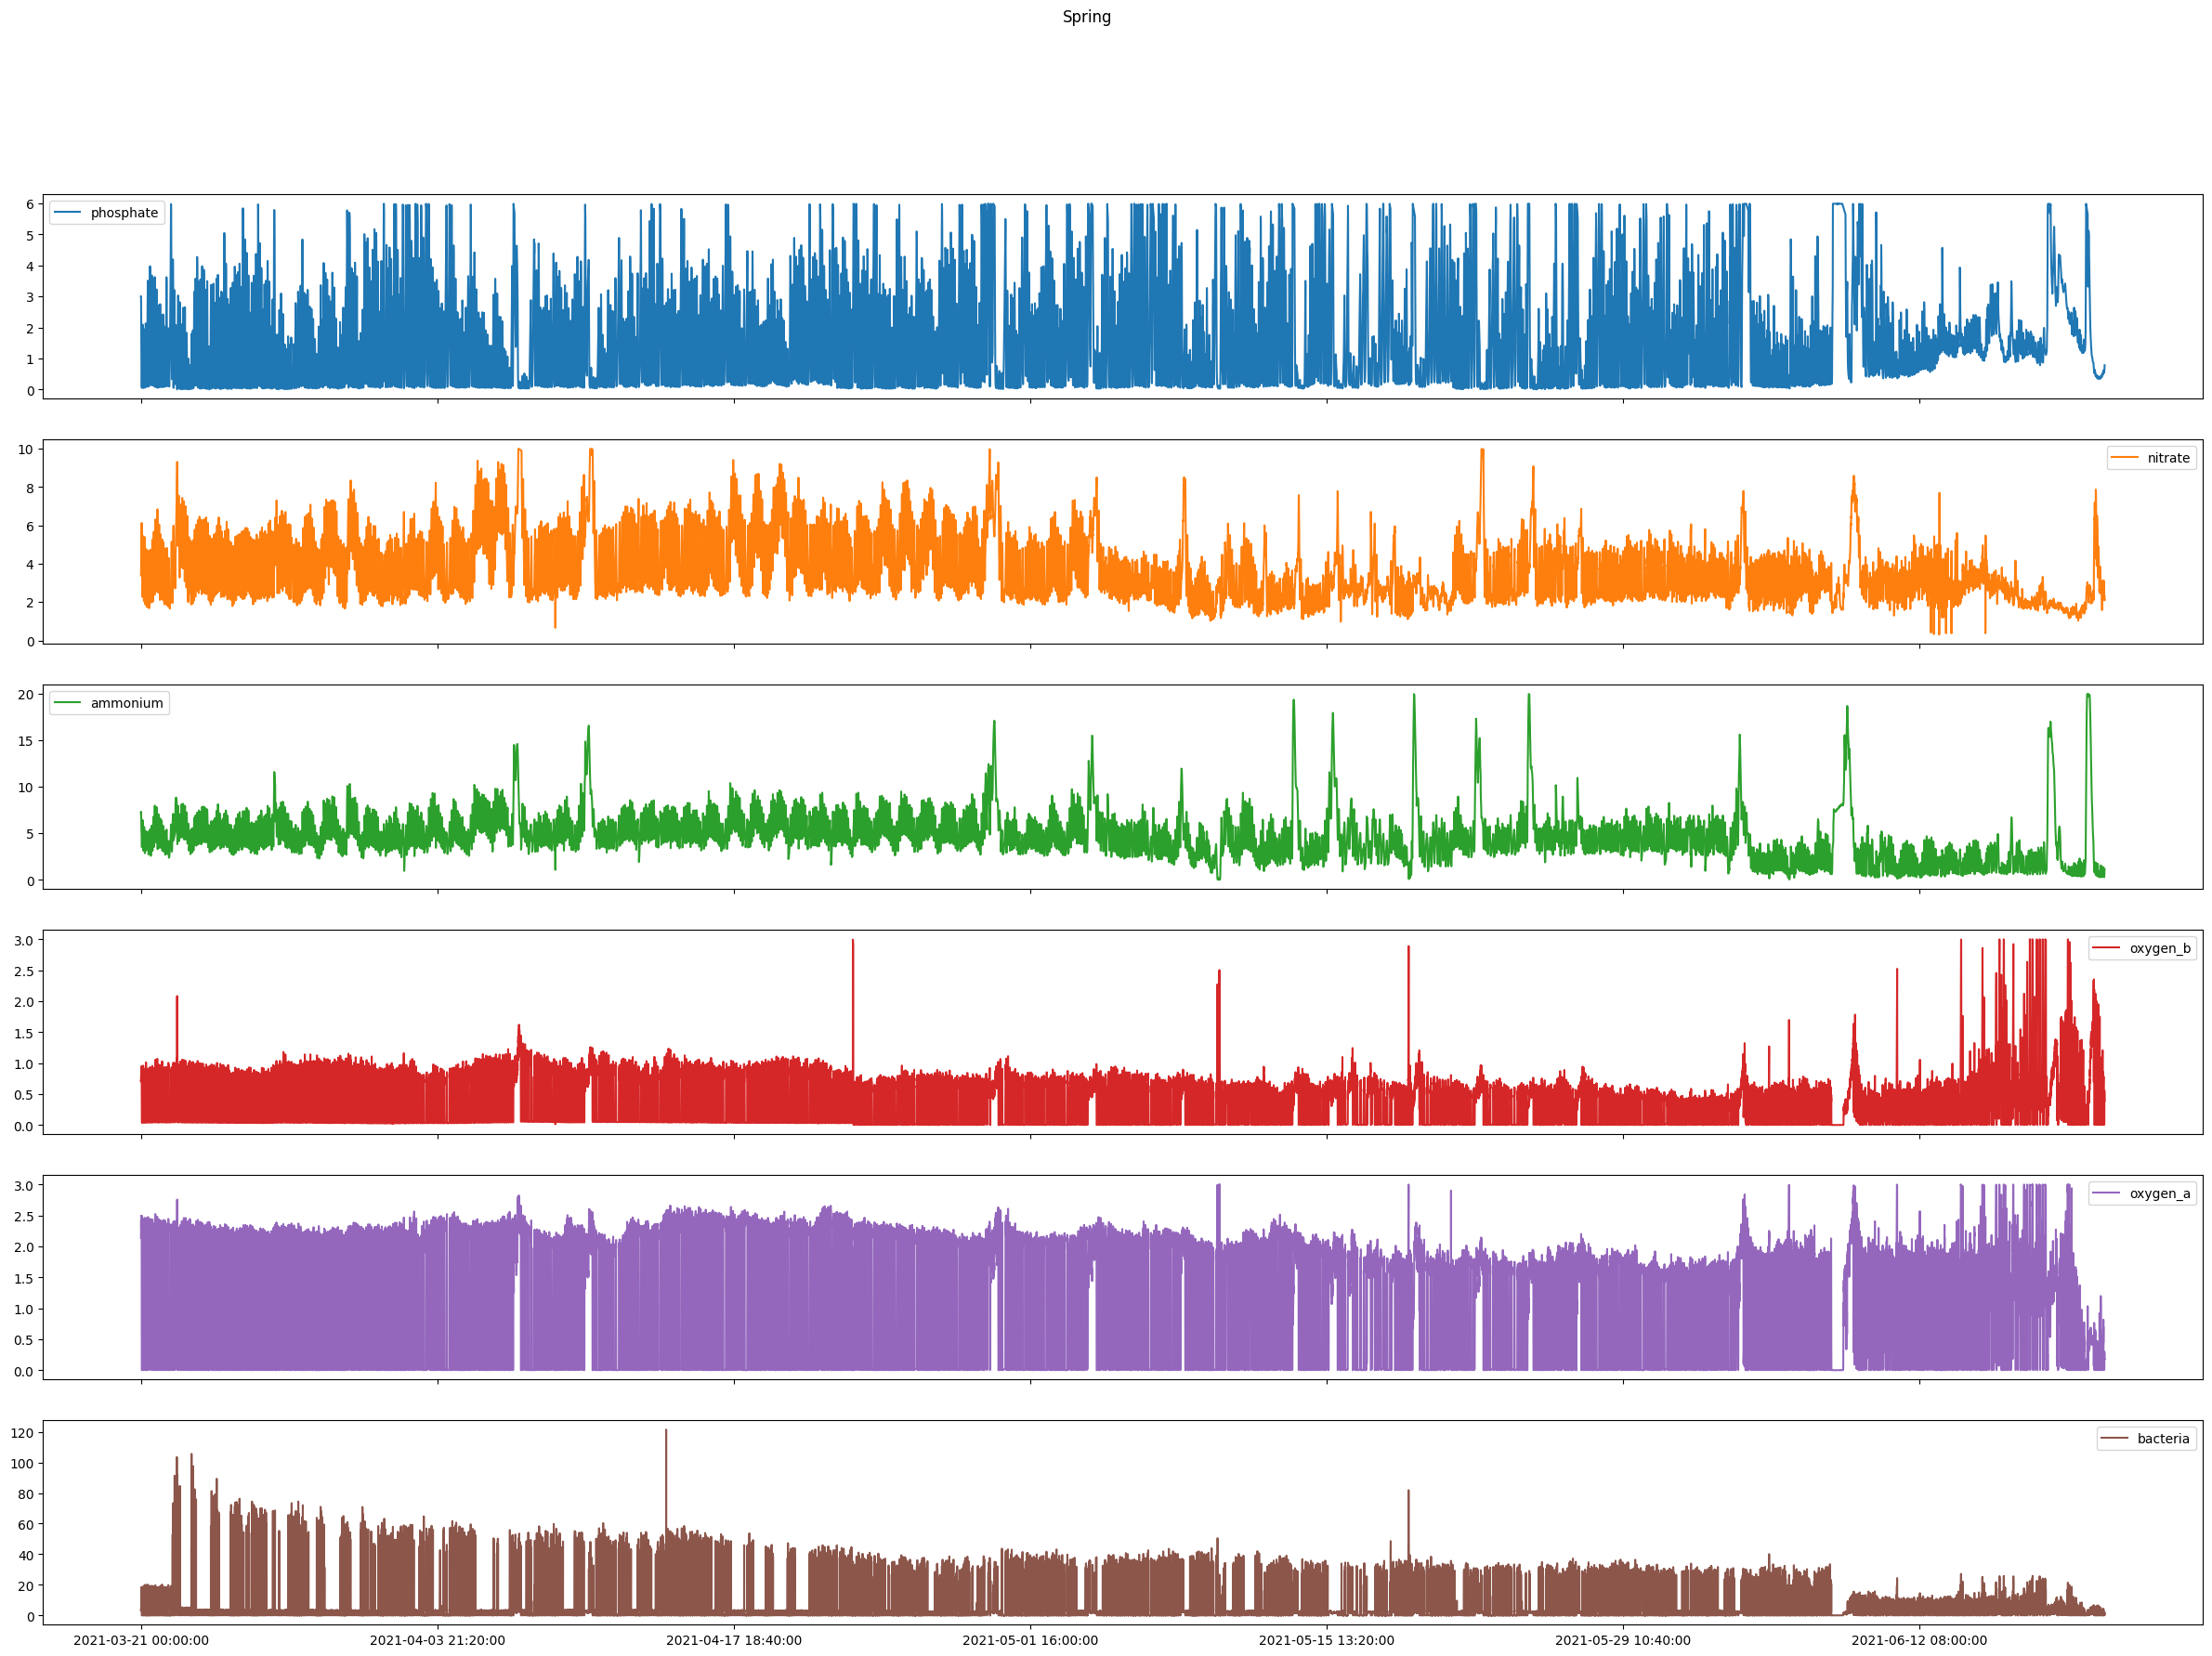

In [16]:
spring_data.plot.line(subplots = True, figsize=(30, 20),title='Spring')

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

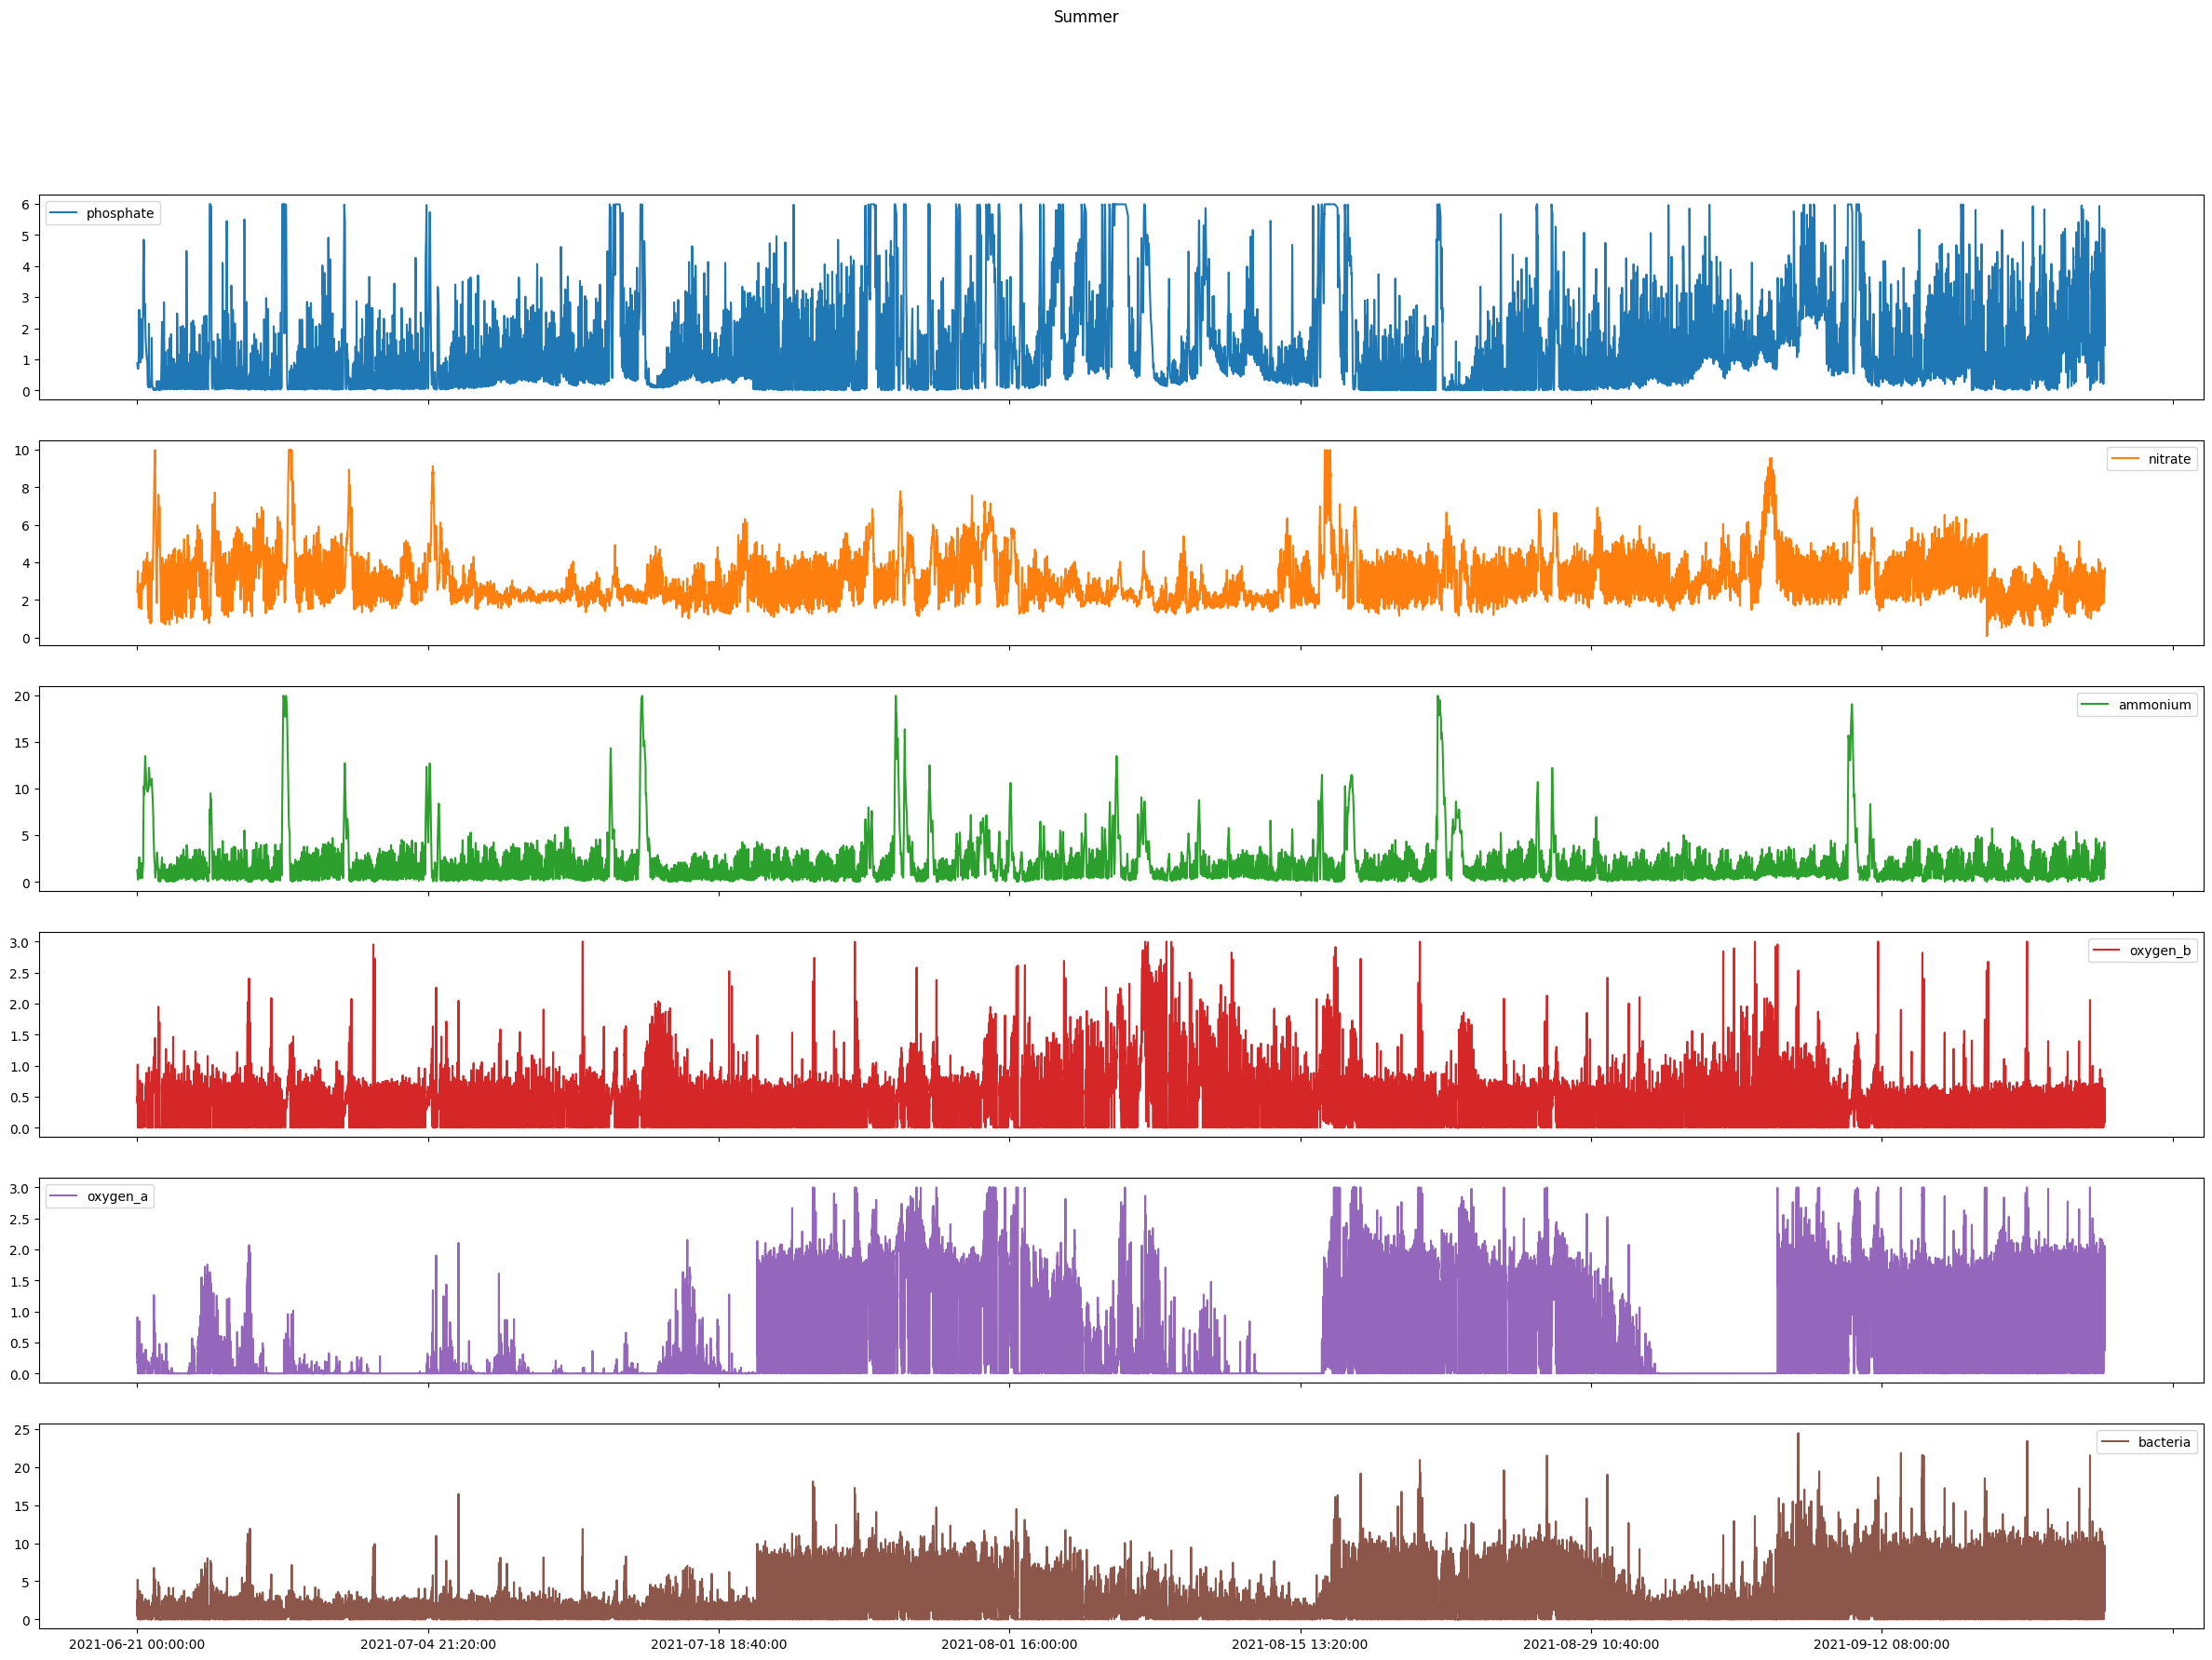

In [17]:
summer_data.plot.line(subplots = True, figsize=(30, 20),title='Summer')

In [18]:
dfs = pd.read_parquet('../data/new_data/new data/oxygen_b_bt_1-1.parquet').set_index('datumBeginMeting').drop(columns={'datumEindeMeting', 'waardebewerkingsmethodeCode','historianTagnummer'})
dfs['hstWaarde'] = dfs['hstWaarde'].astype(float)


<Axes: xlabel='datumBeginMeting'>

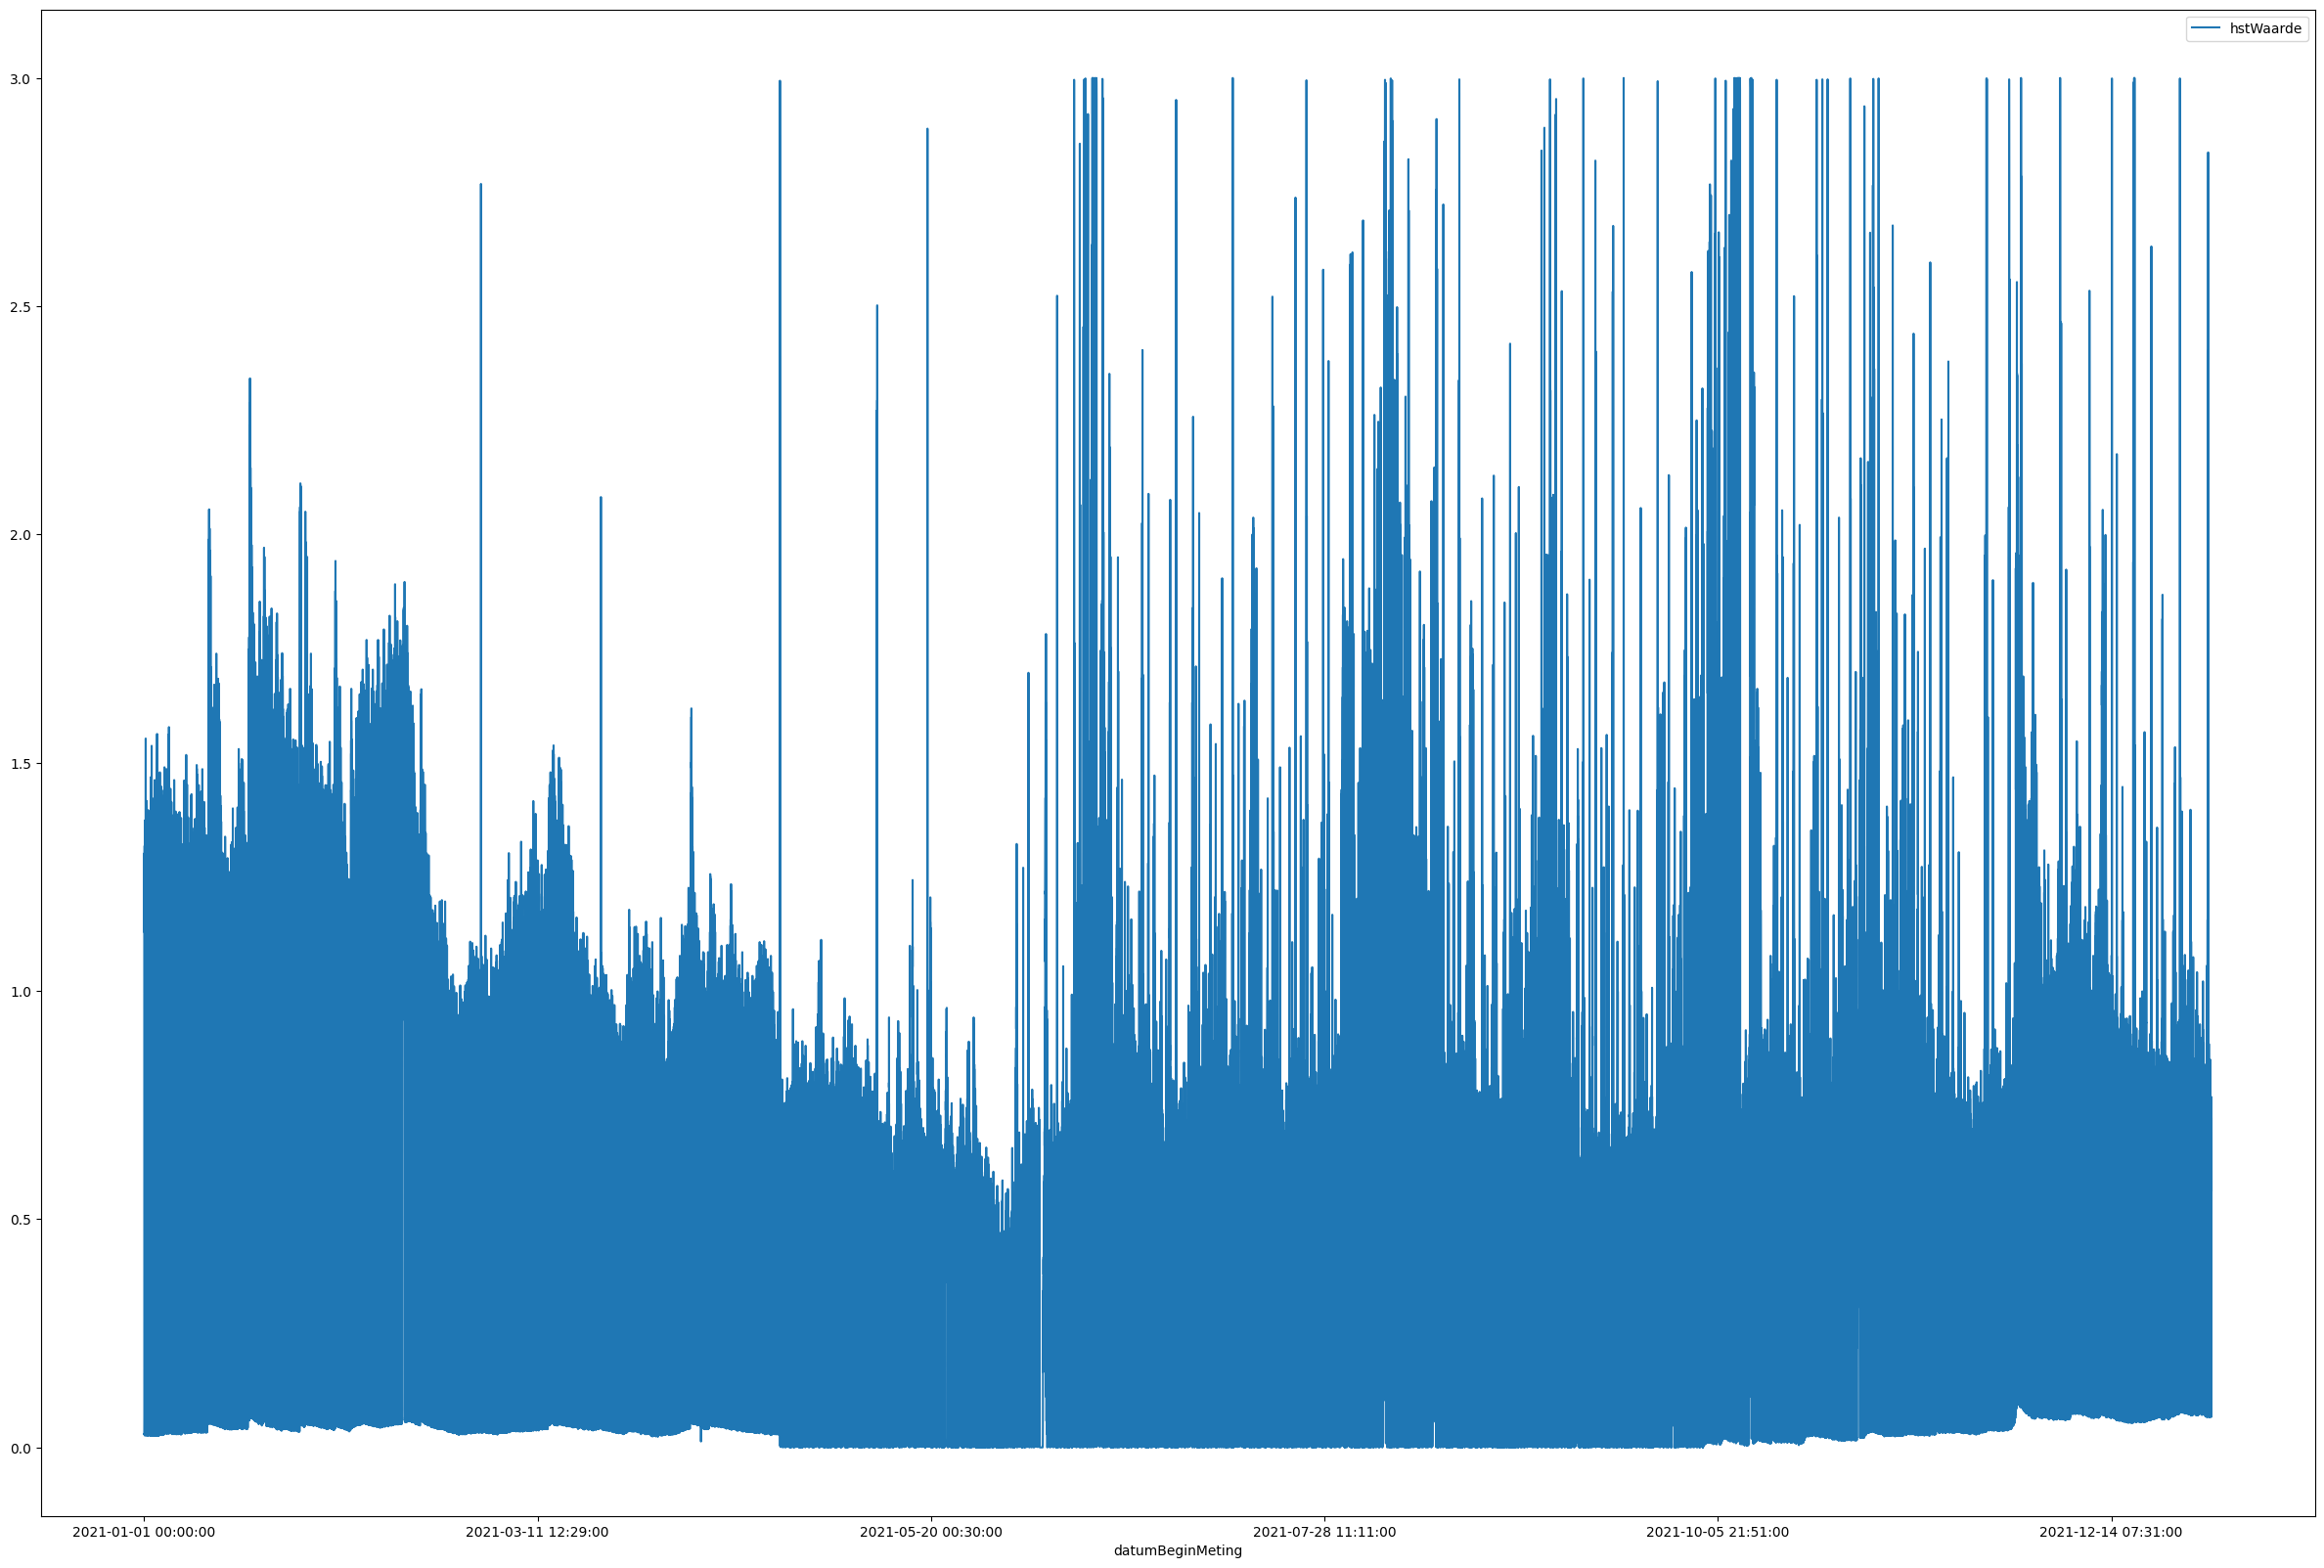

In [19]:
dfs.plot.line(figsize=(30, 20))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

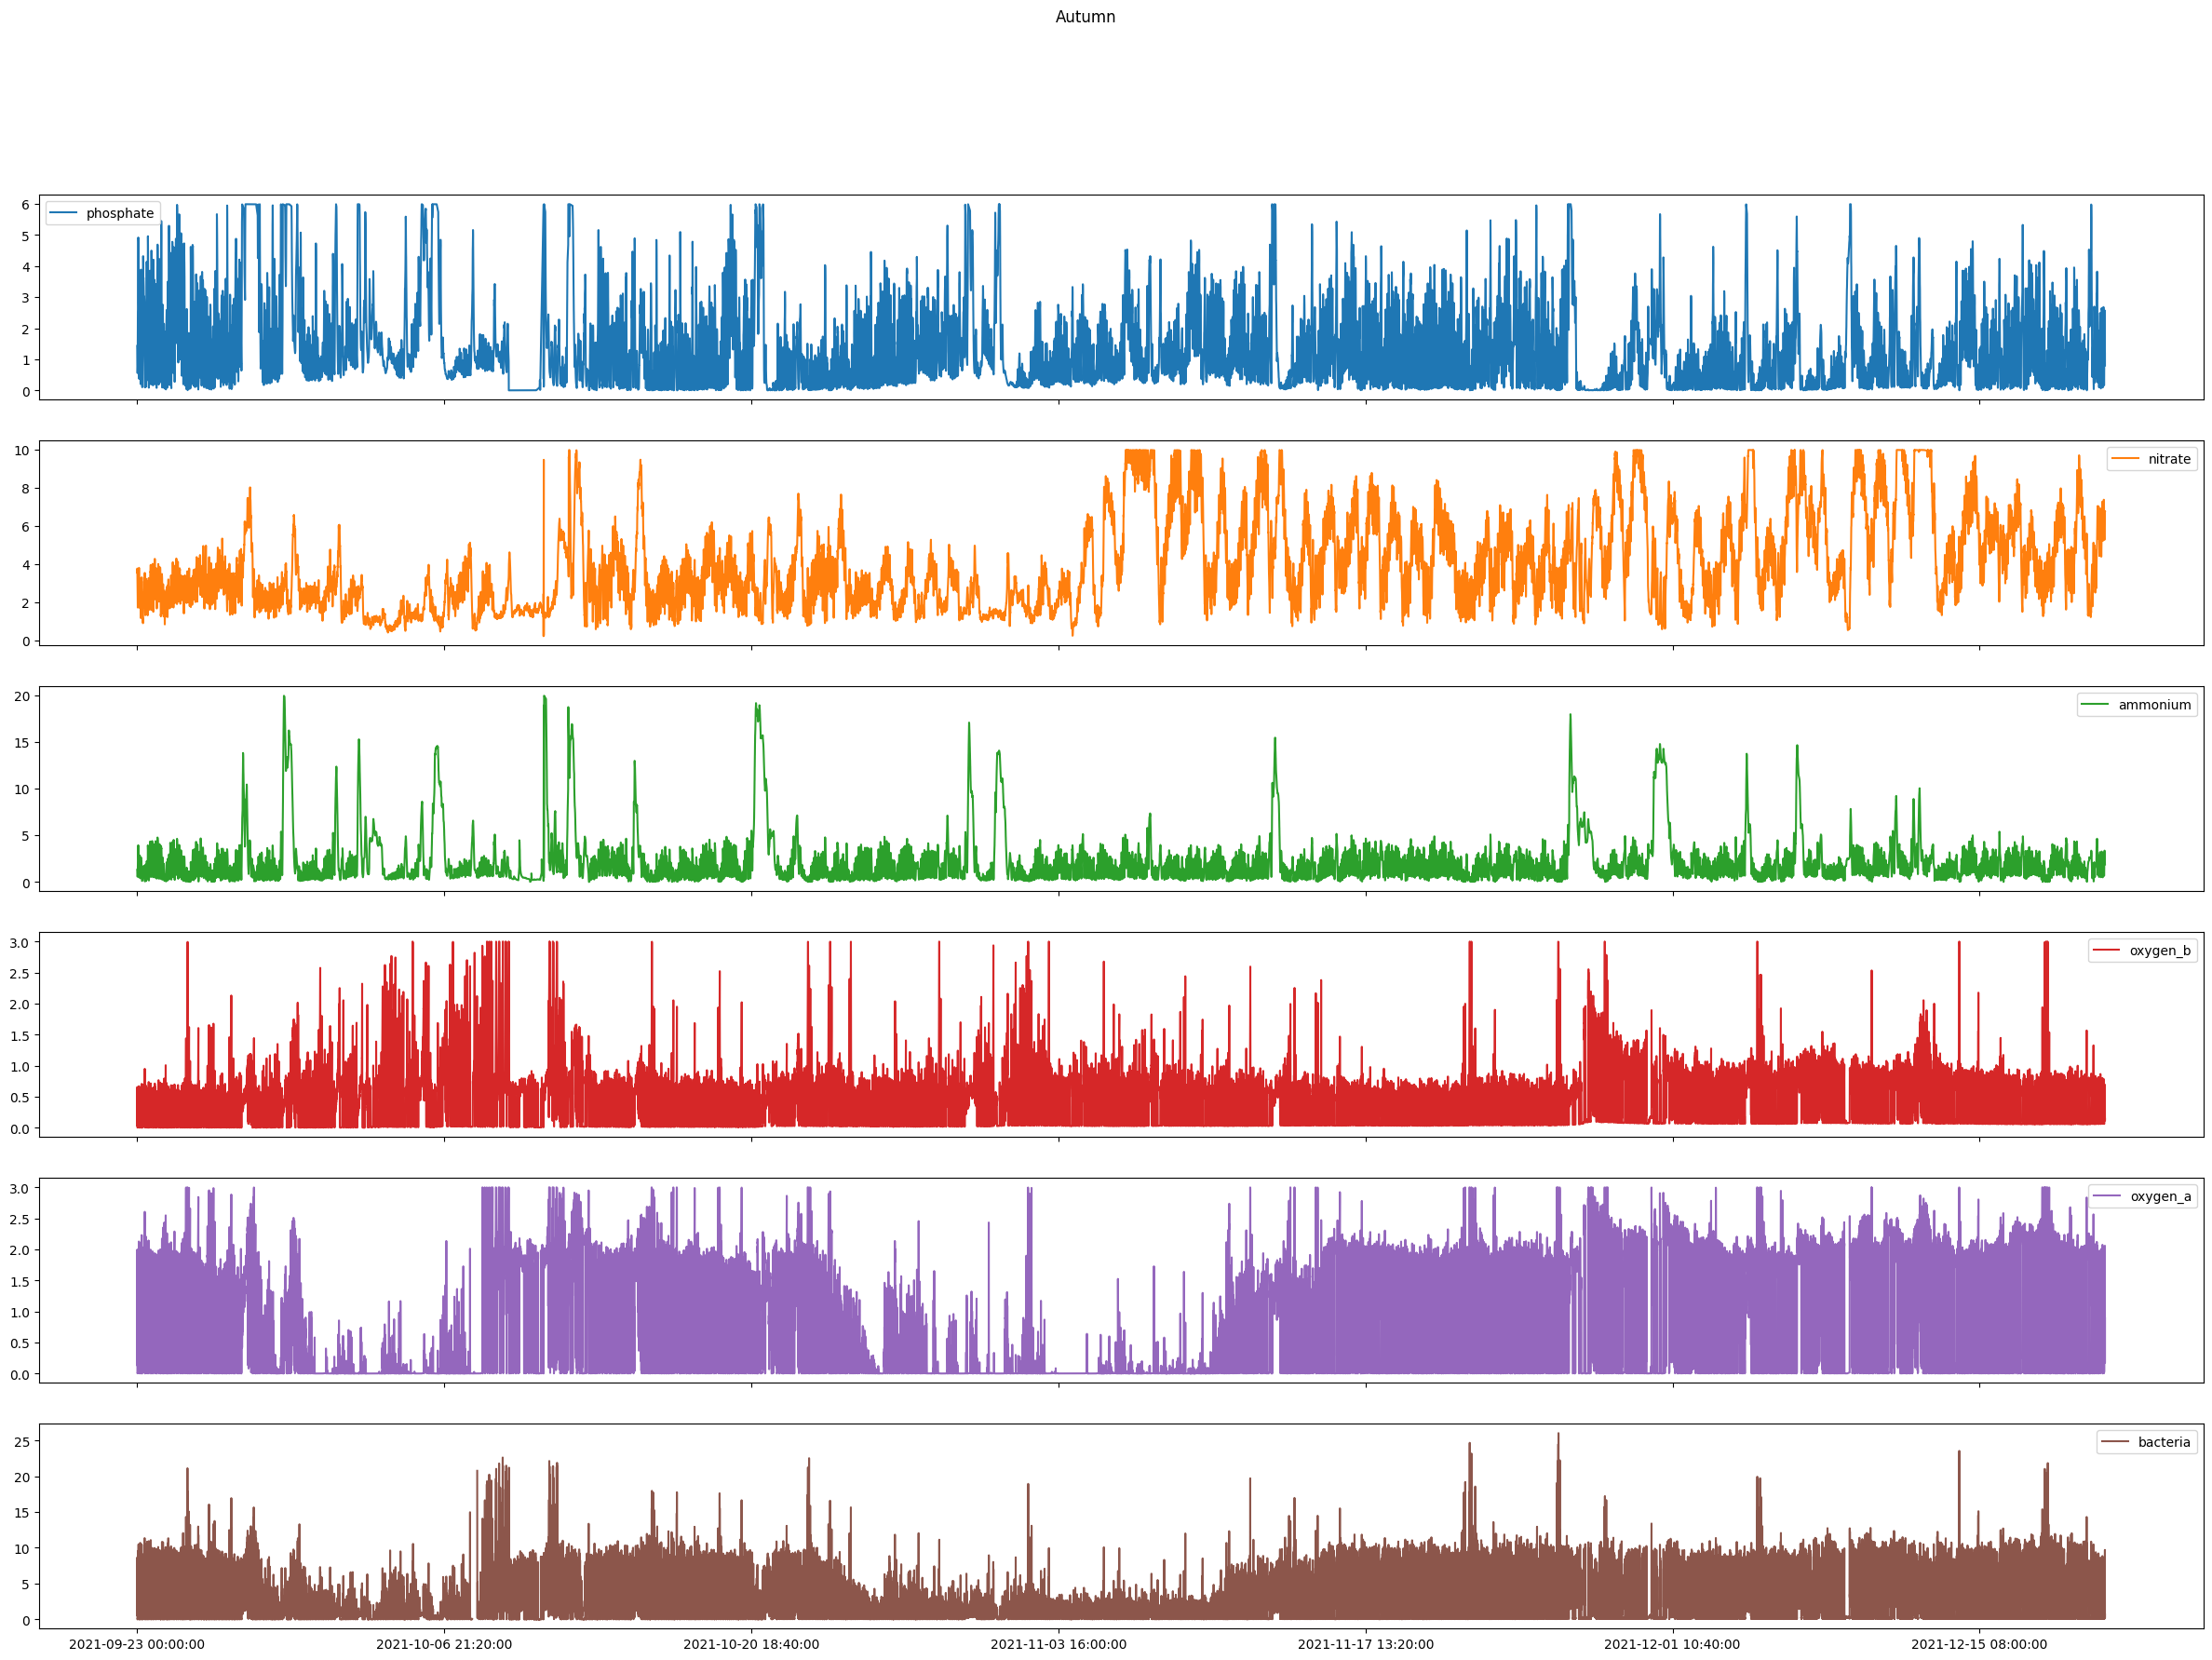

In [20]:
autumn_data.plot.line(subplots = True, figsize=(30, 20),title='Autumn')

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

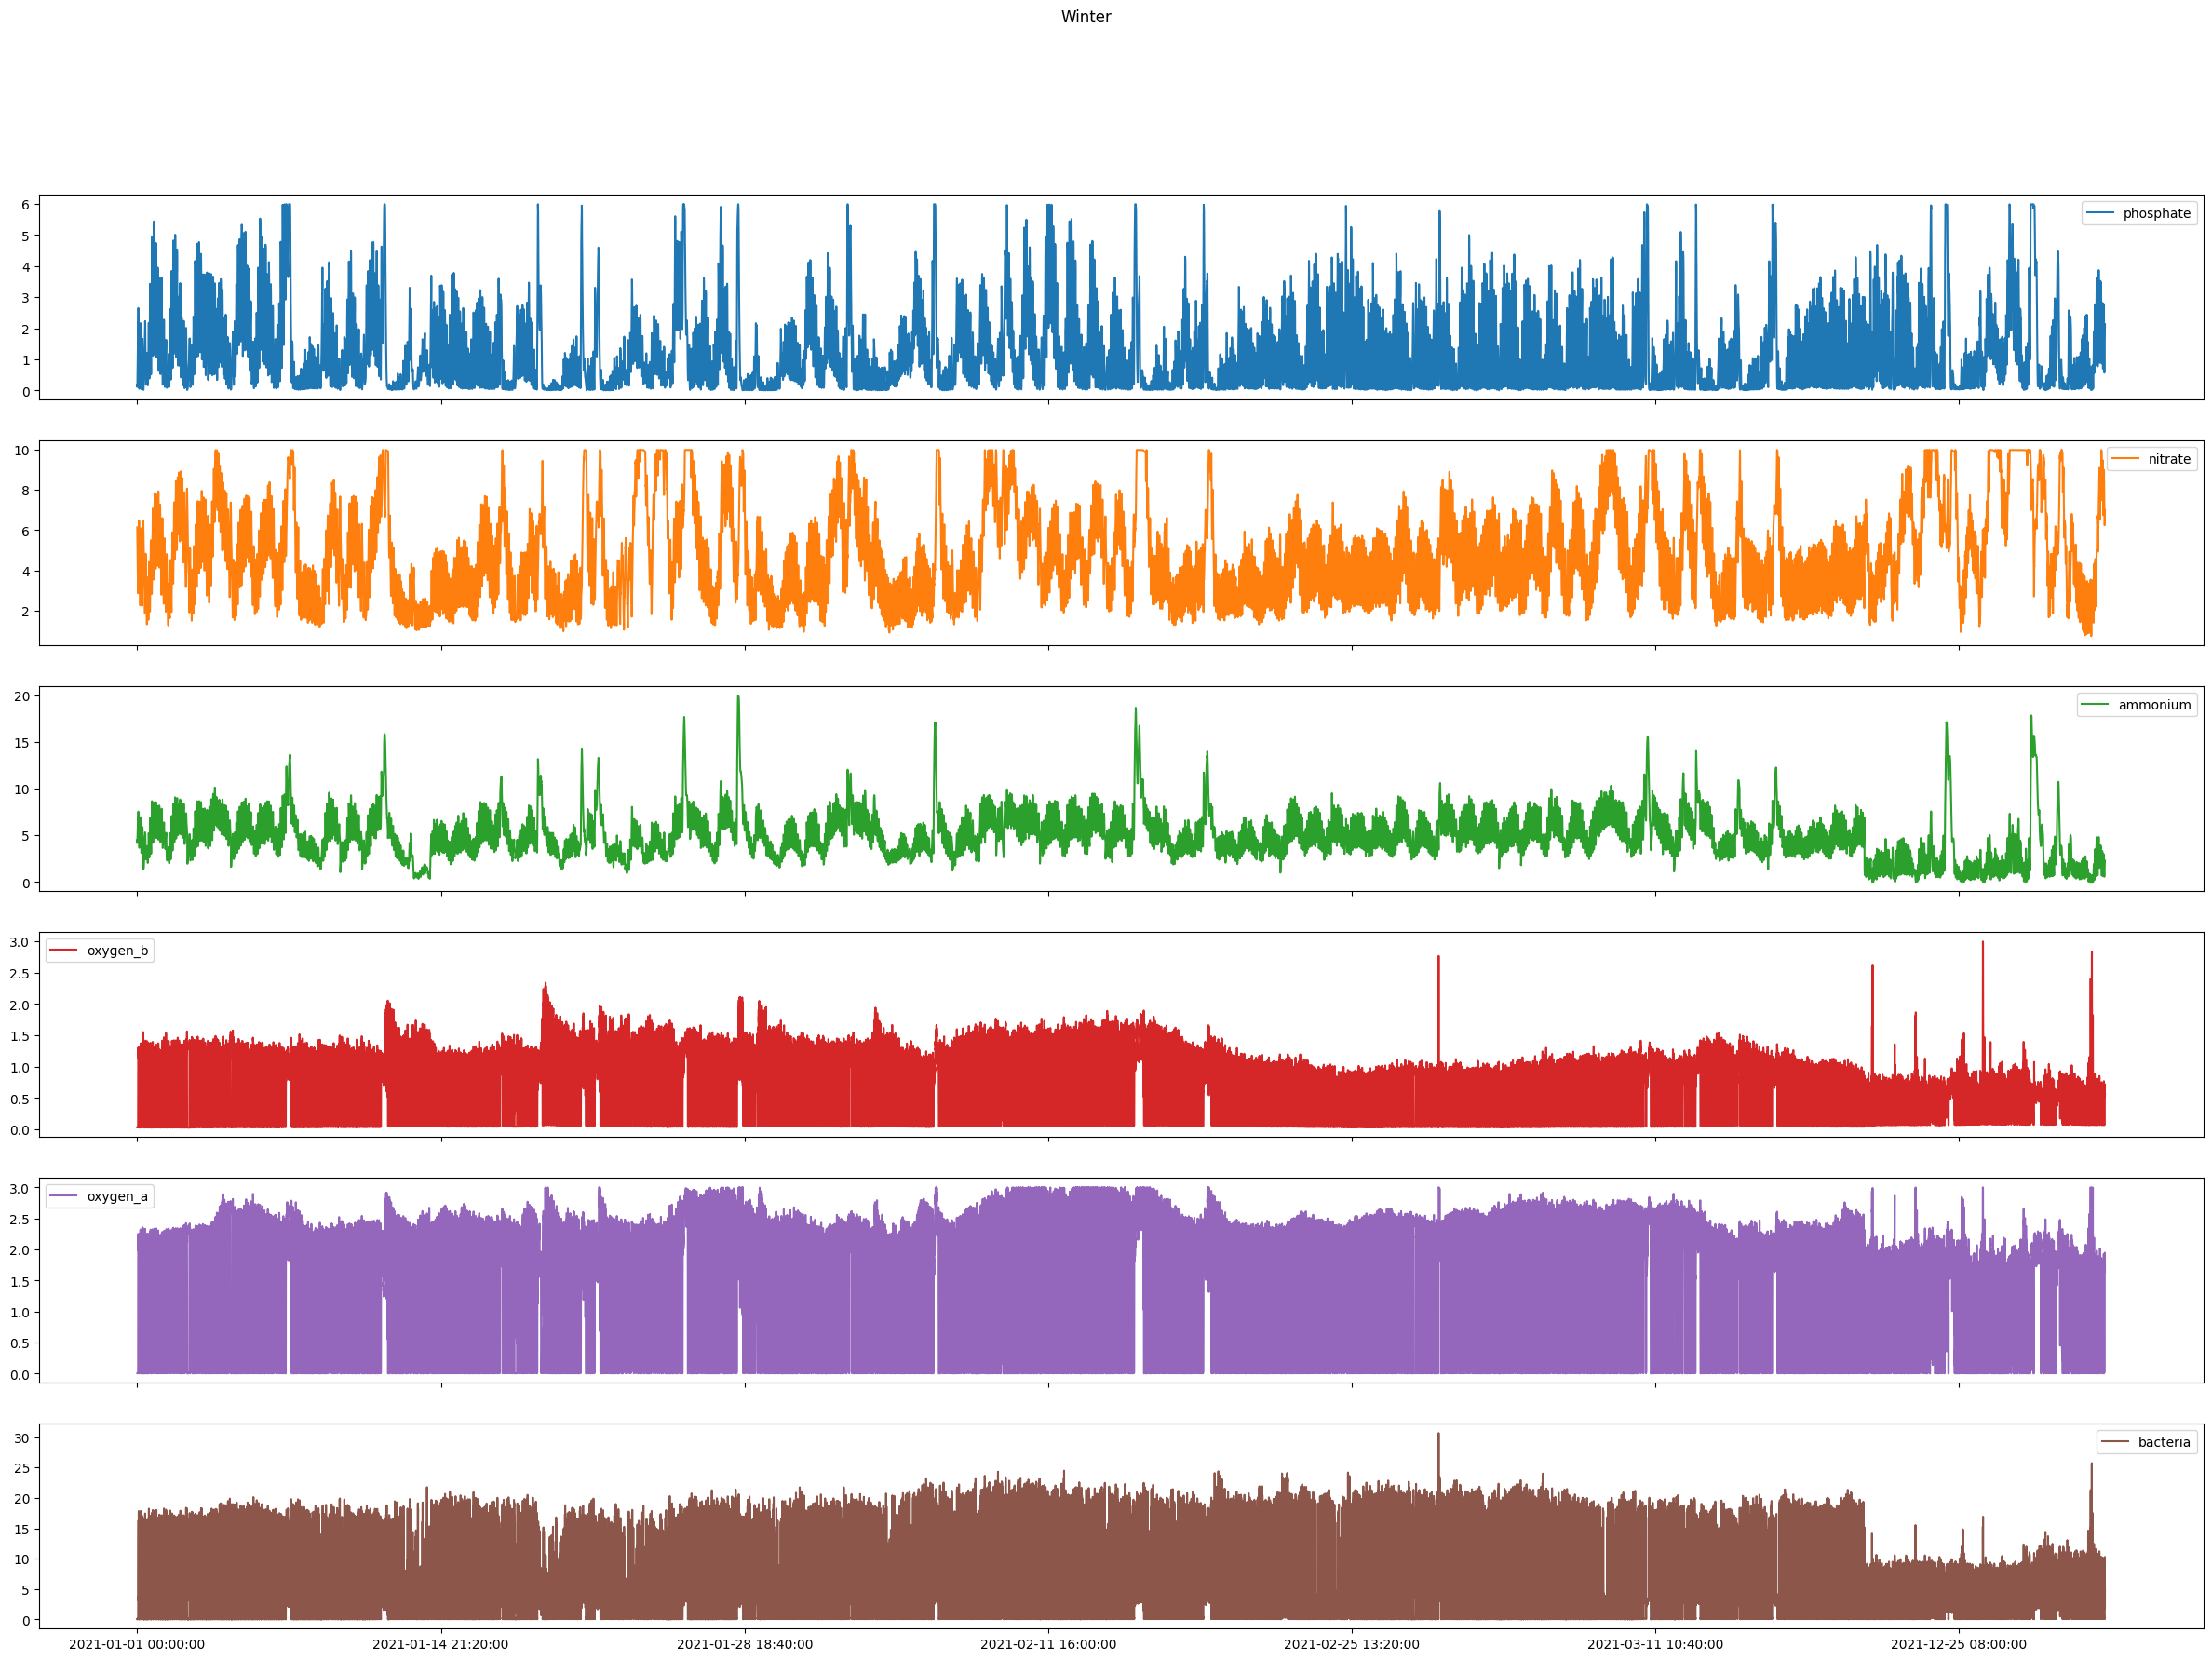

In [21]:
winter_data.plot.line(subplots = True, figsize=(30, 20),title='Winter')

In [22]:
df1 = df1.drop(columns={'date', 'season'})
df1.columns

Index(['phosphate', 'nitrate', 'ammonium', 'oxygen_b', 'oxygen_a', 'bacteria'], dtype='object')

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

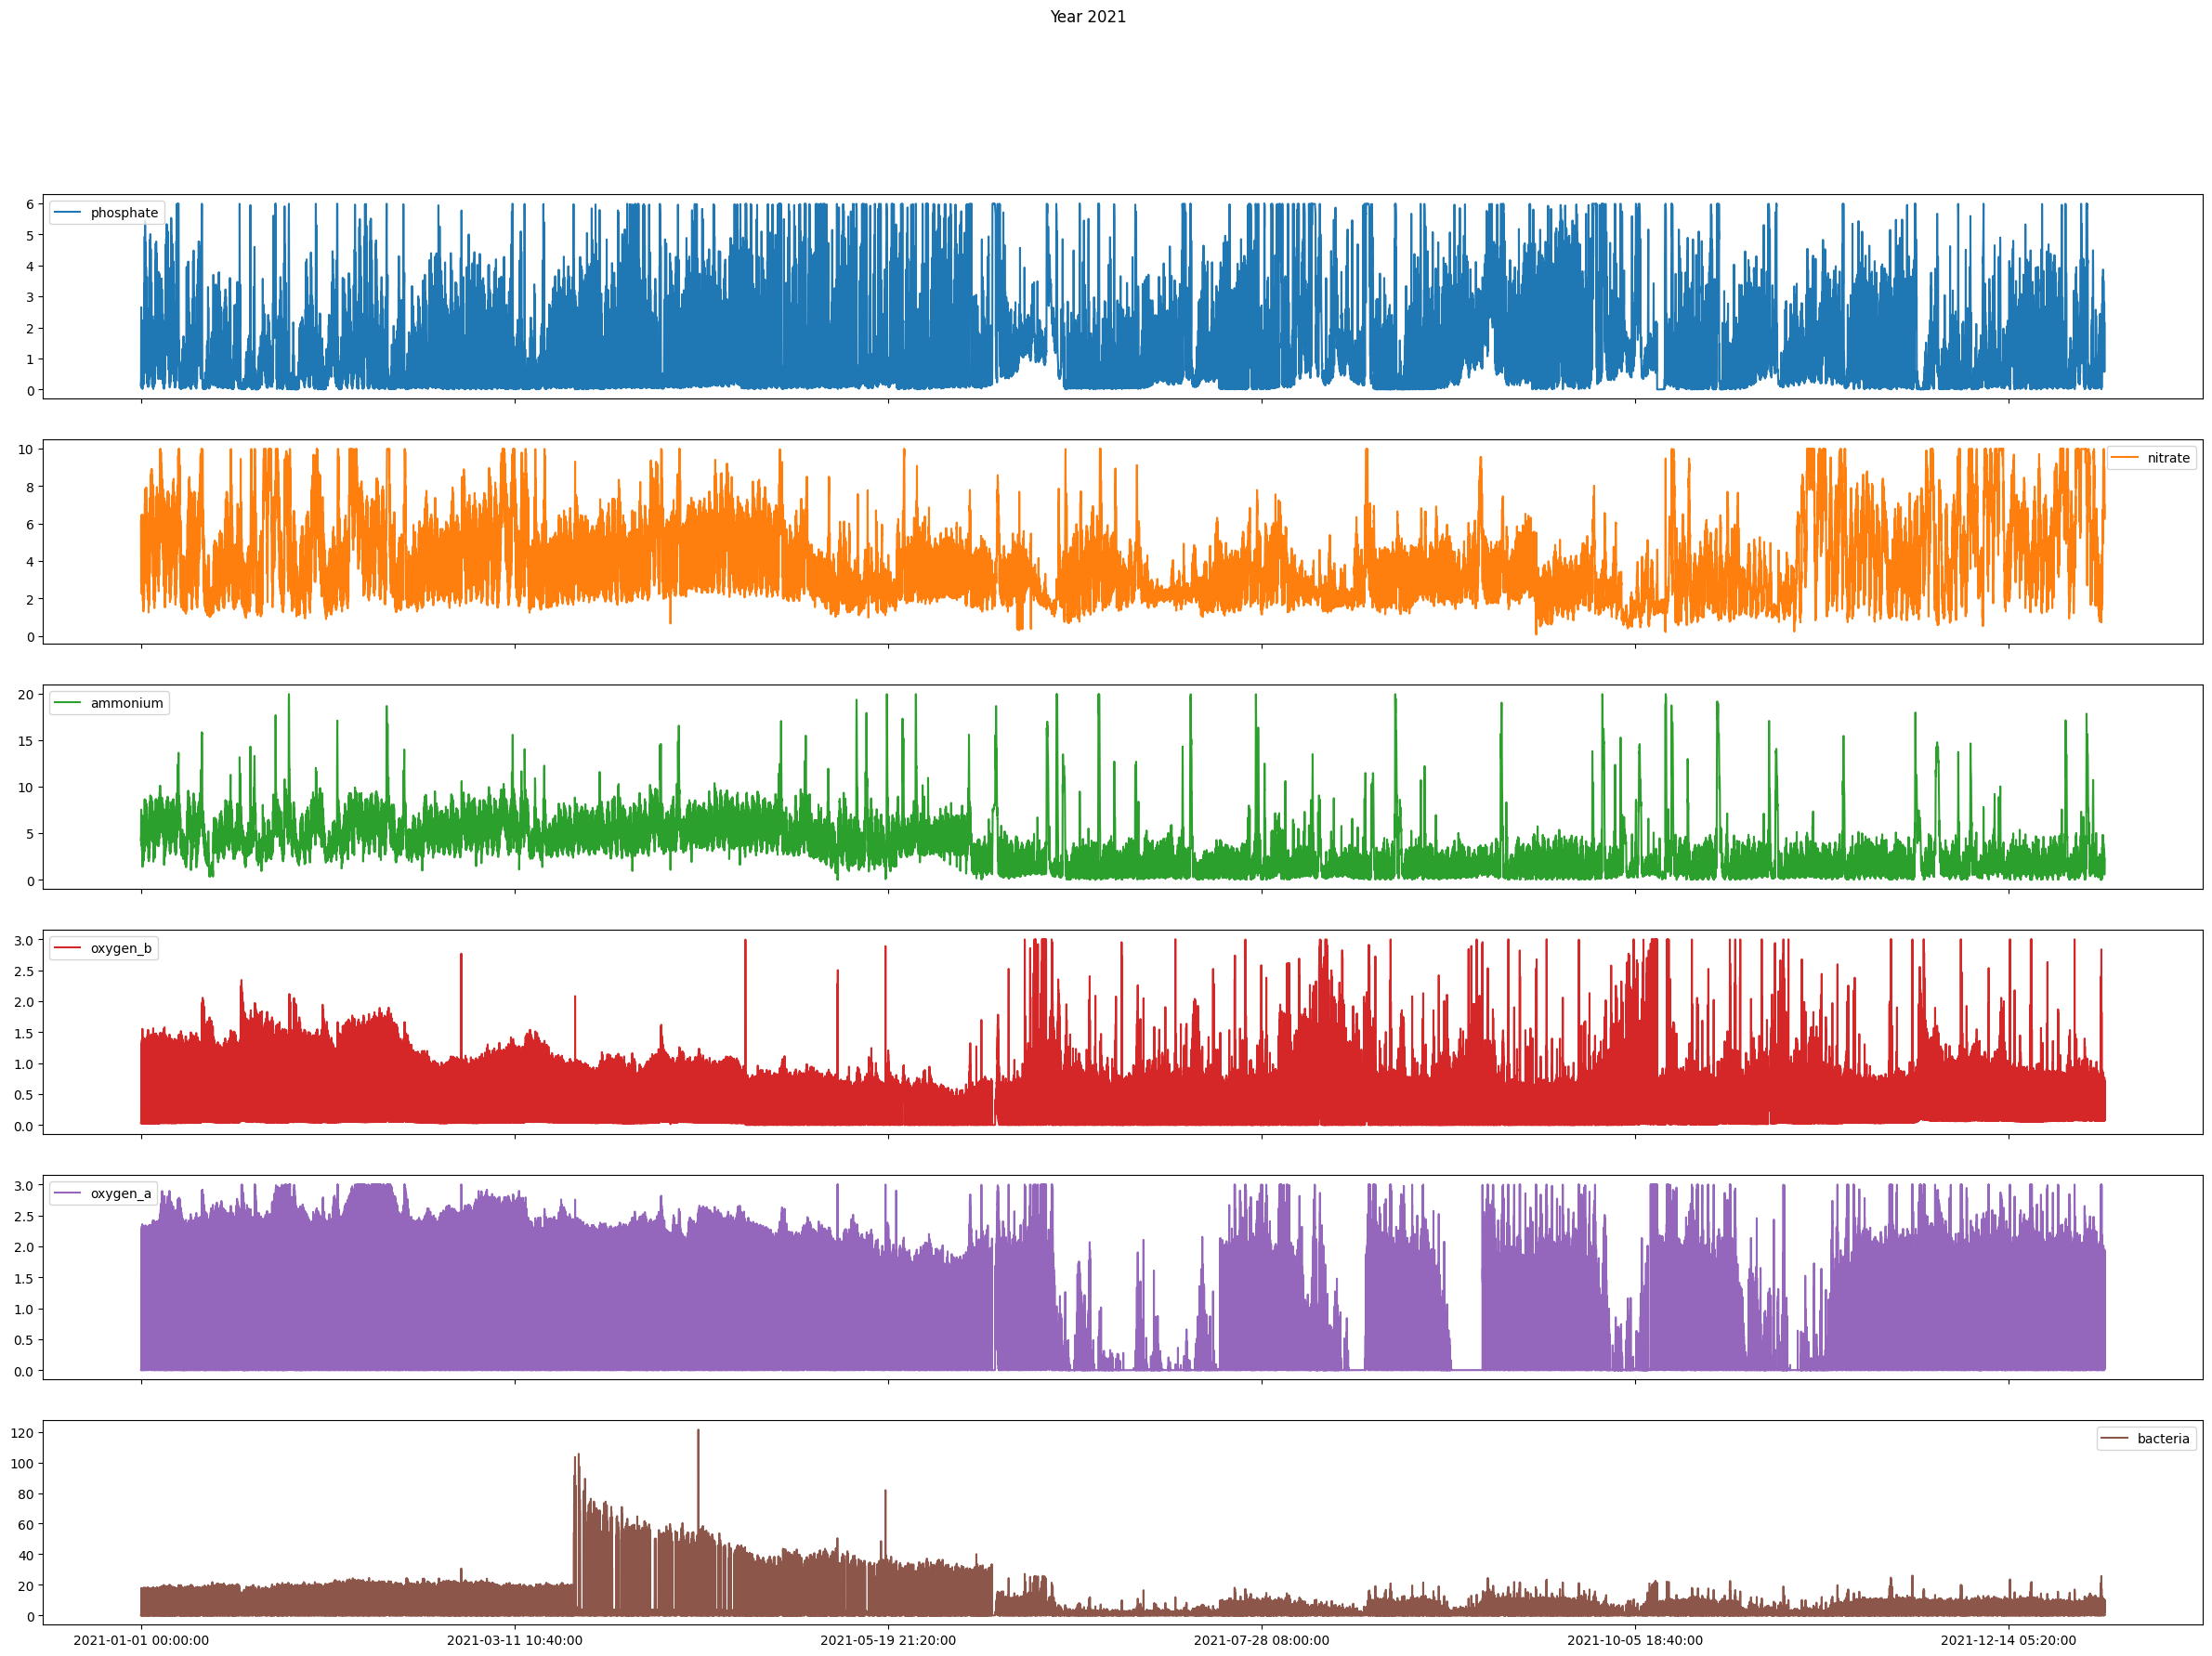

In [23]:
df1.plot.line(subplots = True, figsize=(30, 20),title='Year 2021')

In [24]:
df_corr = df1.corr()
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr)
    )
)
fig.update_layout(title='Year 2021')


In [25]:
df1.corr('pearson')

phosphate   nitrate  ammonium  oxygen_b  oxygen_a  bacteria
phosphate   1.000000 -0.090941  0.468414  0.180290  0.252886  0.148354
nitrate    -0.090941  1.000000  0.195908  0.198811  0.265739  0.113429
ammonium    0.468414  0.195908  1.000000  0.233741  0.360832  0.211005
oxygen_b    0.180290  0.198811  0.233741  1.000000  0.729217  0.441486
oxygen_a    0.252886  0.265739  0.360832  0.729217  1.000000  0.551124
bacteria    0.148354  0.113429  0.211005  0.441486  0.551124  1.000000

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

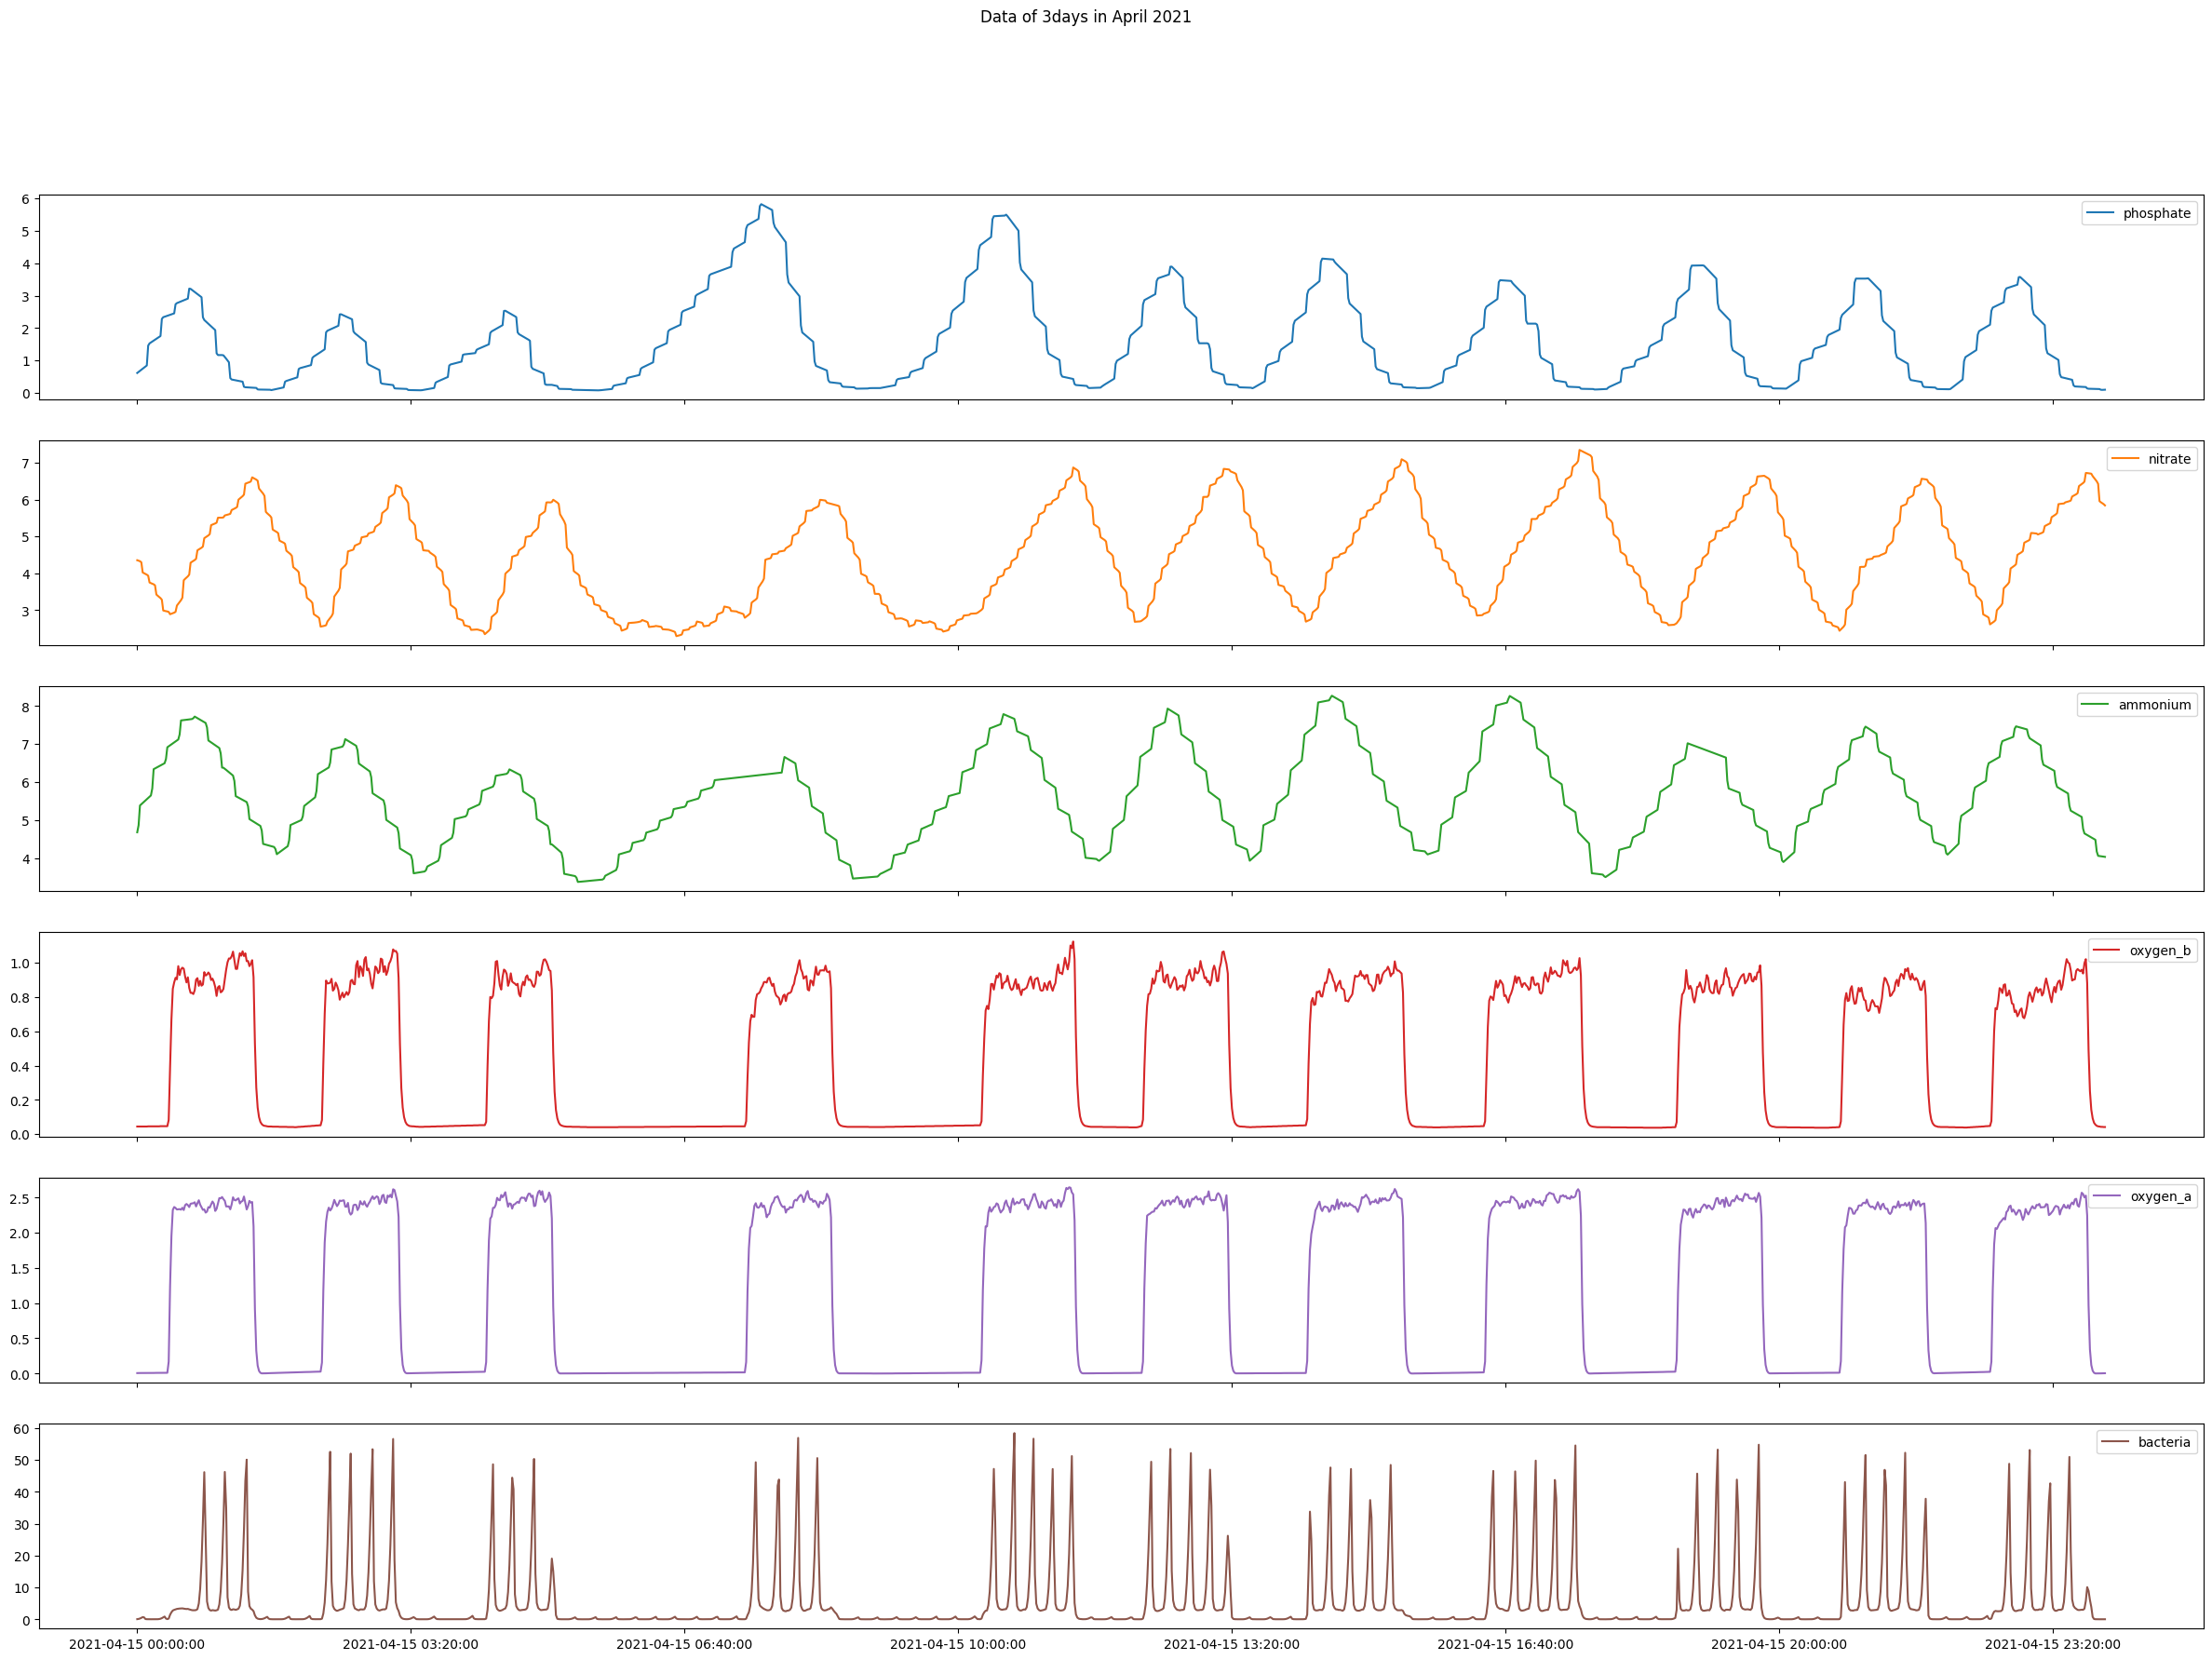

In [26]:
april_data = df1.loc['2021-04-15 00:00':'2021-04-15 23:59']
july_data = df1.loc['2021-07-15 00:00':'2021-07-15 23:59']

april_data.plot.line(subplots = True, figsize=(30, 20),title='Data of 3days in April 2021')

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

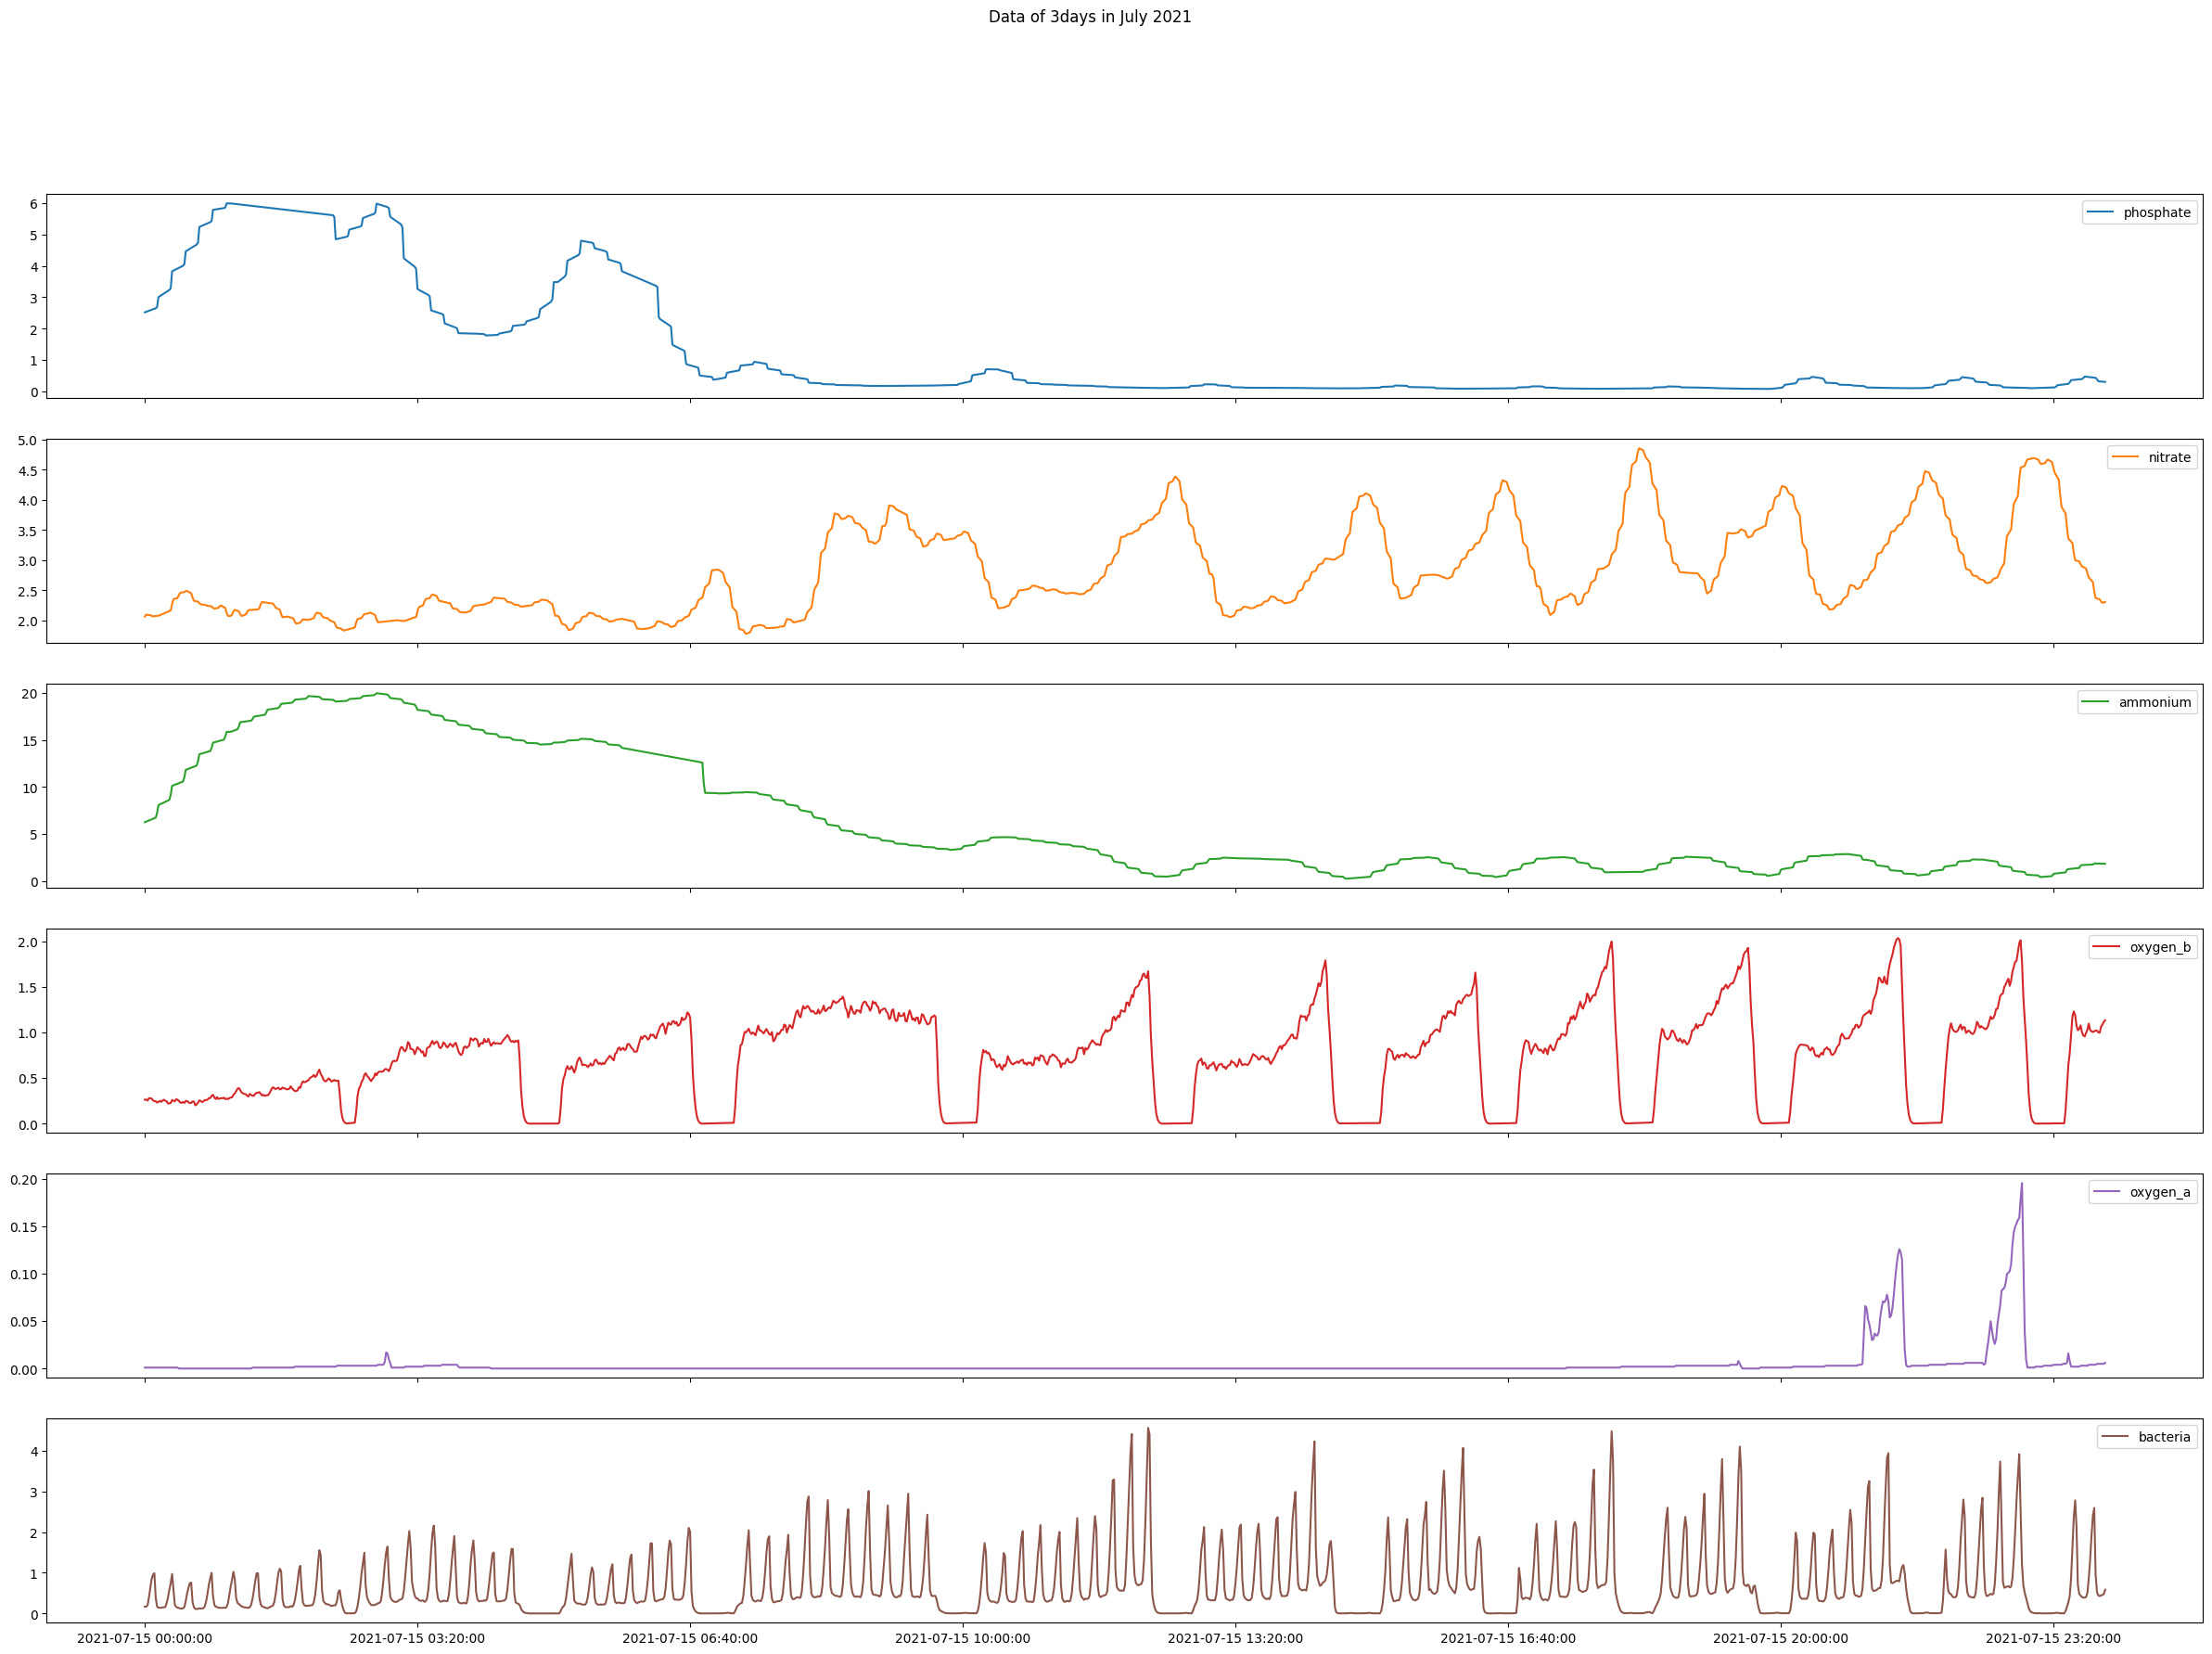

In [27]:
july_data.plot.line(subplots = True, figsize=(30, 20),title='Data of 3days in July 2021')

In [28]:
df1 = df1.reset_index()
df1 = df1.rename(columns={'index':'date'})

In [29]:
df1['date'] = pd.to_datetime(df1['date'])

df1

date  phosphate  nitrate  ammonium  oxygen_b  oxygen_a  \
0      2021-01-01 00:00:00      0.185    6.140     4.487     0.029     0.003   
1      2021-01-01 00:01:00      0.126    6.118     4.263     0.028     0.003   
2      2021-01-01 00:02:00      0.108    5.963     4.173     0.028     0.003   
3      2021-01-01 00:03:00      0.122    5.884     4.194     0.028     0.003   
4      2021-01-01 00:04:00      0.136    5.876     4.214     0.028     0.003   
...                    ...        ...      ...       ...       ...       ...   
525595 2021-12-31 23:55:00      1.935    6.890     2.256     0.549     1.646   
525596 2021-12-31 23:56:00      1.944    6.904     2.264     0.559     1.689   
525597 2021-12-31 23:57:00      2.092    6.985     2.273     0.554     1.693   
525598 2021-12-31 23:58:00      2.133    6.992     2.281     0.568     1.702   
525599 2021-12-31 23:59:00      2.133    6.999     2.289     0.563     1.634   

        bacteria  
0       0.034455  
1       0.033192  
2       0.033857  
3       0.033516  
4       0.032796  
...          ...  
525595  1.851984  
525596  1.925370  
525597  2.107438  
525598  3.203409  
525599  5.041116  

[525600 rows x 7 columns]

In [30]:
daily_average = df1.resample('D',on='date').mean()


In [31]:
daily_average.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-01-01 to 2021-12-31
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   phosphate  365 non-null    float64
 1   nitrate    365 non-null    float64
 2   ammonium   365 non-null    float64
 3   oxygen_b   365 non-null    float64
 4   oxygen_a   365 non-null    float64
 5   bacteria   365 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [32]:
daily_average = daily_average.rename(columns={'EDE_B121069917_K600_phosphate.csv':'phosphate','EDE_B121069914_K600_nitrate.csv':'nitrate','EDE_B121069913_K600_ammonium.csv':'ammonium','EDE_B121069907_K600_oxygen_b.csv':'oxygen_b','EDE_B121069901_K600_oxygen_a.csv':'oxygen_a'})

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

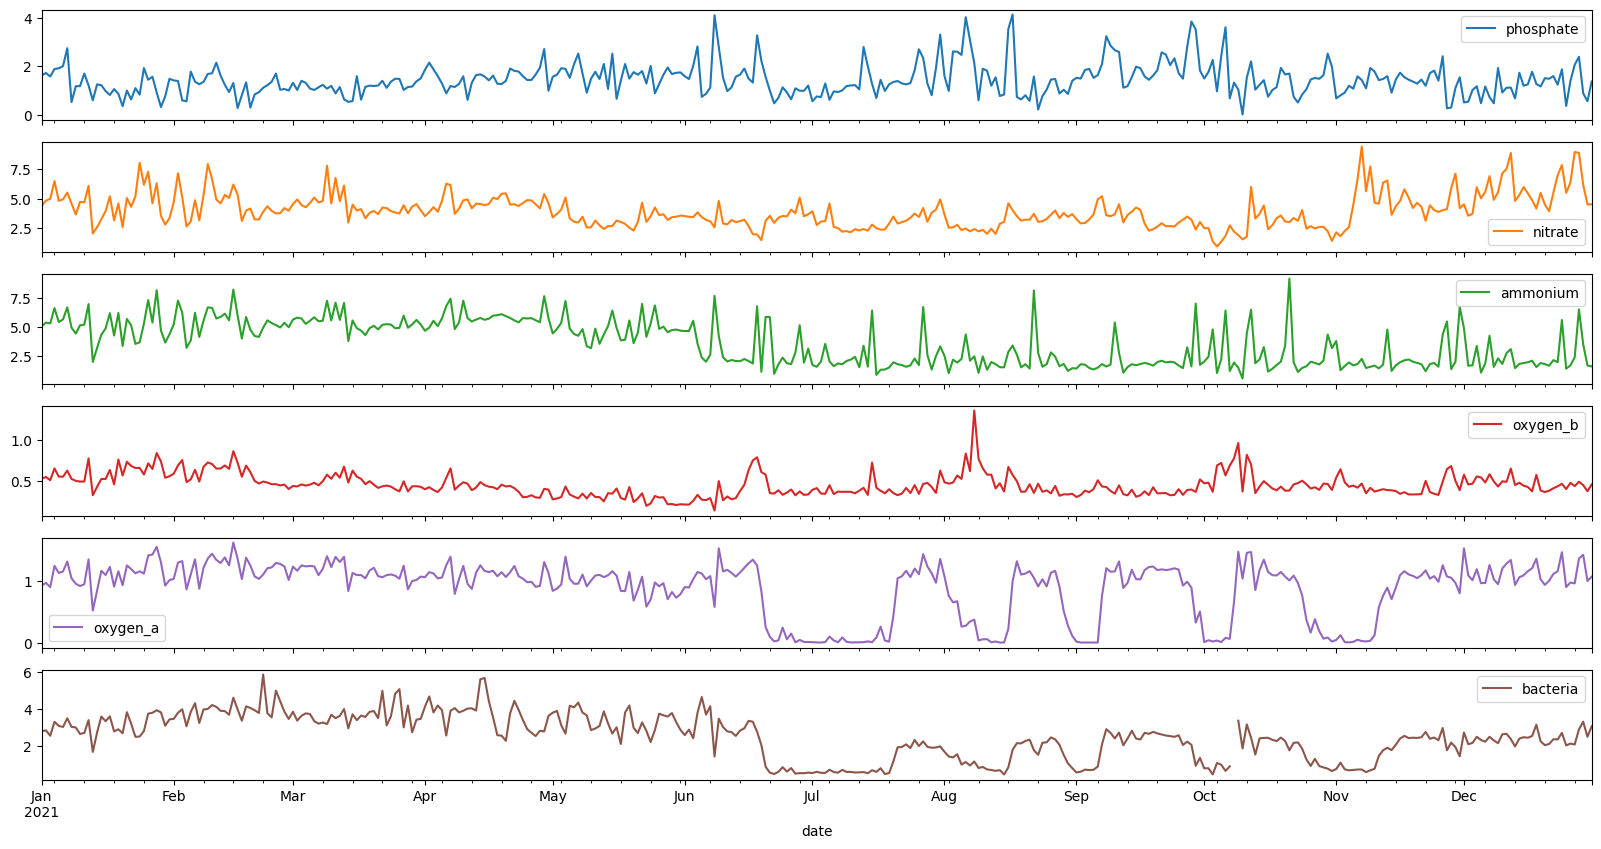

In [33]:
daily_average.plot.line(subplots = True , figsize=(20,10))

In [34]:
# pd.DataFrame.to_csv(daily_average,'../data/daily_average.csv')

In [35]:
df_corr = daily_average.corr().round(5) 
# fig = go.Figure()

# fig.add_trace(
#     go.Heatmap(
#         x = df_corr.columns,
#         y = df_corr.index,
#         z = np.array(df_corr)
#     )
# )
# fig.update_layout(title='Year 2021')

fig = px.imshow(df_corr, text_auto=True, aspect="auto")
fig.show()

In [36]:
df_corr

phosphate  nitrate  ammonium  oxygen_b  oxygen_a  bacteria
phosphate    1.00000 -0.07711   0.14341  -0.06209   0.00073  -0.03637
nitrate     -0.07711  1.00000   0.34327   0.21047   0.41283   0.28730
ammonium     0.14341  0.34327   1.00000   0.22167   0.43123   0.57139
oxygen_b    -0.06209  0.21047   0.22167   1.00000   0.18350   0.11882
oxygen_a     0.00073  0.41283   0.43123   0.18350   1.00000   0.80450
bacteria    -0.03637  0.28730   0.57139   0.11882   0.80450   1.00000